
# Librerias

Inicialmente importamos las librerias que usaremos para trabajar en el EDA de este datset


#Base de datos Cooindustrial#

El dataset que he decidido utilizar pertenece a una cooperativa, la cual se encarga de dar créditos a las personas y obtener ganancias a través de los intereses que se generan.

Con el presente EDA intentaremos encontrar algún comportamiento o patrón qué nos ayude a pronosticar o indicar qué créditos pueden llegar pueden pagarse a tiempo, cuales se pueden atrasar o cuales pueden llegar a no cancelarse perdiendo el capital. 

Dado el problema planteado las variables que creo me ayudarán a resolver el problema son:


*   Valor de prestamo
*   numero de cuotas
*   tipo prestamo
*   Porcentaje intereses pactados
*   tipo intereses
*   forma de pago (Semanal, quiencenal, mensual)
*   Tipo prestamo

Creo que estas variables me ayudaran a resolver este problema, porque en el conocimiento que he adquirido intervienen directa e indirectamente en la variable objetivo elegida.

Para este ejercicio tenemos la base de datos del software que maneja la empresa y algunas planillas de excel que el software arroja.

El siguiente código lo usé para conectarme y extraer la información directamente de la base de datos MySQL debido que al generar el archivo .csv desde MySQL y leerlo con pandas, se cargaba con errores (truncaba columnas o datos incompletos).

Con dicho código se corregíeron dichos errores y luego exporté con pandas a un archivo .csv.

#Código para crear la conexión a la base de datos



```
import pymysql

'''cadena de conexion a la base de datos'''
conn = pymysql.connect(
    host = "localhost", 
    user = "root", 
    passwd = "041292_Diego", 
    db = "cooindustrialdb")
 
'''instrución de sql con la cual obtengo los datos de la tabla prestamo'''

consulta = "SELECT * from prestamo"
df_p = pd.read_sql_query(consulta,con = conn) '''aqui realizo la consulta con la cadena de conexion y convierto dichos datos de una vez a pandas con la funcion 'read_sql_query' que sirve es especial para leer bases de datos sql'''
conn.close ()

df_p
df_p.to_csv('prestamo_ex.csv', sep=';') '''convierto los datos leidos anteriormente a un archivo .csv con separador  ';' '''
```



In [919]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [920]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Dataframe que contiene la informacion de los creditos.

In [921]:
data_raw = pd.read_csv('/content/drive/MyDrive/Data Science Acamica/Sprint 1/Proyecto/prestamo_ex.csv', sep=';', index_col = 0)
df_prestamo = data_raw
df_prestamo.head()

num_prestamo  valor_prestamo  ...  codigoemp  valorfinalprestamo
0          1340        230000.0  ...       2222                 0.0
1          1341        440000.0  ...       2222                 0.0
2          1342       1000000.0  ...       2222                 0.0
3          1343        200000.0  ...       8866                 0.0
4          1344        313794.0  ...       2222                 0.0

[5 rows x 17 columns]

In [922]:
#Mirando numero de filas y columns que hay en el dataframe
df_prestamo.shape

(80998, 17)

In [923]:
#Nombres de las columnas
df_prestamo.columns

Index(['num_prestamo', 'valor_prestamo', 'valor_entregado', 'intereses',
       'valor_cuota', 'num_cuotas', 'cuotas_pen', 'tipo_interes', 'forma_pago',
       'tipo_prestamo', 'mercancia', 'estado_prestamo', 'desc_prestamo',
       'fecha_prestamo', 'cod_cliente', 'codigoemp', 'valorfinalprestamo'],
      dtype='object')

In [924]:
#tipo de datos por columna
df_prestamo.dtypes

num_prestamo            int64
valor_prestamo        float64
valor_entregado       float64
intereses               int64
valor_cuota           float64
num_cuotas              int64
cuotas_pen              int64
tipo_interes           object
forma_pago             object
tipo_prestamo          object
mercancia              object
estado_prestamo        object
desc_prestamo          object
fecha_prestamo         object
cod_cliente             int64
codigoemp               int64
valorfinalprestamo    float64
dtype: object

In [925]:
#Se convirtio la columna 'fecha_prestamo' de tipo de dato object a datetime, para poder trabajar mas facilmente con ella luego
df_prestamo['fecha_prestamo'] = pd.to_datetime(df_prestamo['fecha_prestamo'], format="%Y/%m/%d %H:%M:%S")
df_prestamo.head()

num_prestamo  valor_prestamo  ...  codigoemp  valorfinalprestamo
0          1340        230000.0  ...       2222                 0.0
1          1341        440000.0  ...       2222                 0.0
2          1342       1000000.0  ...       2222                 0.0
3          1343        200000.0  ...       8866                 0.0
4          1344        313794.0  ...       2222                 0.0

[5 rows x 17 columns]

In [926]:
#verificamos el tipo de datos
df_prestamo.dtypes

num_prestamo                   int64
valor_prestamo               float64
valor_entregado              float64
intereses                      int64
valor_cuota                  float64
num_cuotas                     int64
cuotas_pen                     int64
tipo_interes                  object
forma_pago                    object
tipo_prestamo                 object
mercancia                     object
estado_prestamo               object
desc_prestamo                 object
fecha_prestamo        datetime64[ns]
cod_cliente                    int64
codigoemp                      int64
valorfinalprestamo           float64
dtype: object

In [927]:
#Obtener el numero de filas duplicadas
filas_duplicadas = df_prestamo[df_prestamo.duplicated()]
filas_duplicadas.shape

(0, 17)

In [928]:
#en esta instruccion procedo a mirar la cantidad de valores nulos o faltantes que hay por columna
df_prestamo.isnull().sum()

num_prestamo              0
valor_prestamo            0
valor_entregado           0
intereses                 0
valor_cuota               0
num_cuotas                0
cuotas_pen                0
tipo_interes              0
forma_pago                0
tipo_prestamo             0
mercancia             59123
estado_prestamo           0
desc_prestamo         75423
fecha_prestamo            0
cod_cliente               0
codigoemp                 0
valorfinalprestamo        0
dtype: int64

Debido a lo anterior y al encontrar que en las columnas "mercancia" y "desc_prestamo" hay una gran cantidad de valores nulos con respecto al total de filas o registros que tiene el dataframe, se procede a eliminar dichas columnas.
Tambien se eliminara la columna que no tendra uso alguno como 'codigoemp'
ya que esta columna es para identificar el empleado que creo dicho crédito.
Las 3 columnas eliminadas no son relevantes para la consecución de la variable objetivo.

In [929]:
df_prestamo.drop(columns=['mercancia','desc_prestamo','codigoemp'],inplace=True)


In [930]:
#en esta instruccion procedo a mirar la cantidad de valores nulos o faltantes que hay por columna
df_prestamo.isnull().sum()

num_prestamo          0
valor_prestamo        0
valor_entregado       0
intereses             0
valor_cuota           0
num_cuotas            0
cuotas_pen            0
tipo_interes          0
forma_pago            0
tipo_prestamo         0
estado_prestamo       0
fecha_prestamo        0
cod_cliente           0
valorfinalprestamo    0
dtype: int64

In [931]:
df_prestamo.shape

(80998, 14)

In [932]:
#Selecciono las variables numéricas
df_prestamo.iloc[:,1:6].describe()

valor_prestamo  valor_entregado  ...   valor_cuota    num_cuotas
count    8.099800e+04     8.099800e+04  ...  8.099800e+04  80998.000000
mean     2.702891e+05     1.553117e+05  ...  1.239652e+05      3.947517
std      5.571446e+05     2.894644e+05  ...  1.088389e+05     77.698227
min      0.000000e+00     0.000000e+00  ...  0.000000e+00     -1.000000
25%      5.000000e+04     3.000000e+04  ...  5.500000e+04      1.000000
50%      1.000000e+05     1.000000e+05  ...  1.100000e+05      1.000000
75%      2.000000e+05     1.600000e+05  ...  1.650000e+05      1.000000
max      1.263268e+07     1.165238e+07  ...  4.560000e+06  15000.000000

[8 rows x 5 columns]

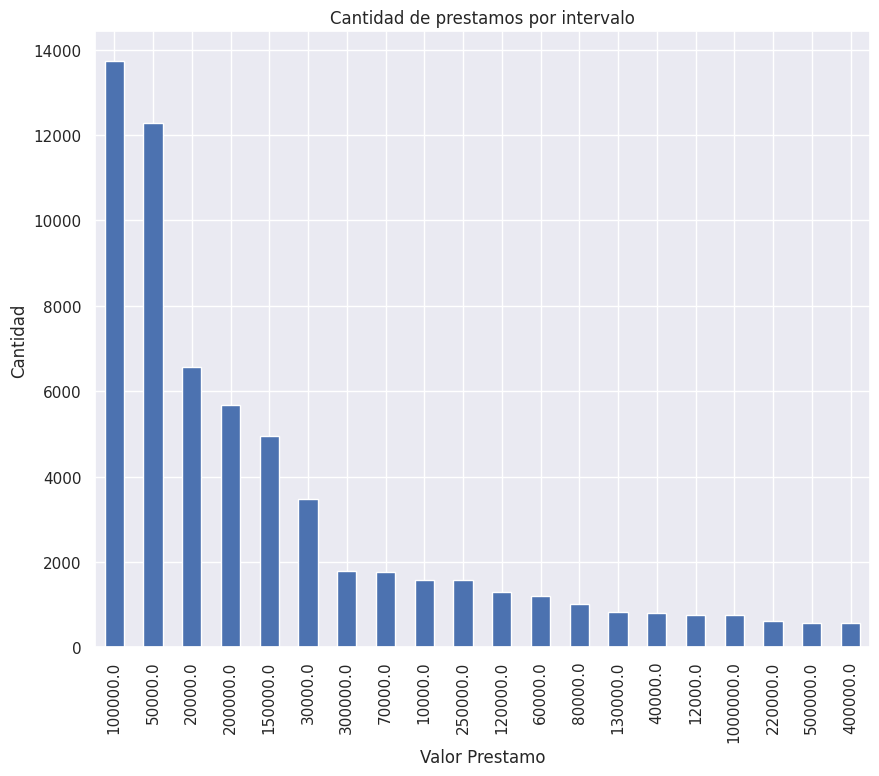

In [933]:
#realizamos un gráfico de barras 
#con los 20 valores de créditos mas frecuentes
df_prestamo.valor_prestamo.value_counts().nlargest(20).plot(kind='bar', figsize=(10,8))
plt.title('Cantidad de prestamos por intervalo')
plt.xlabel('Valor Prestamo')
plt.ylabel('Cantidad')
plt.show();

En la anterior imagen nos damos cuenta que de los 81 mil préstamos que hay aproximadamente, casi 70 mil se encuentran entre 10 mil y 300 mil. 

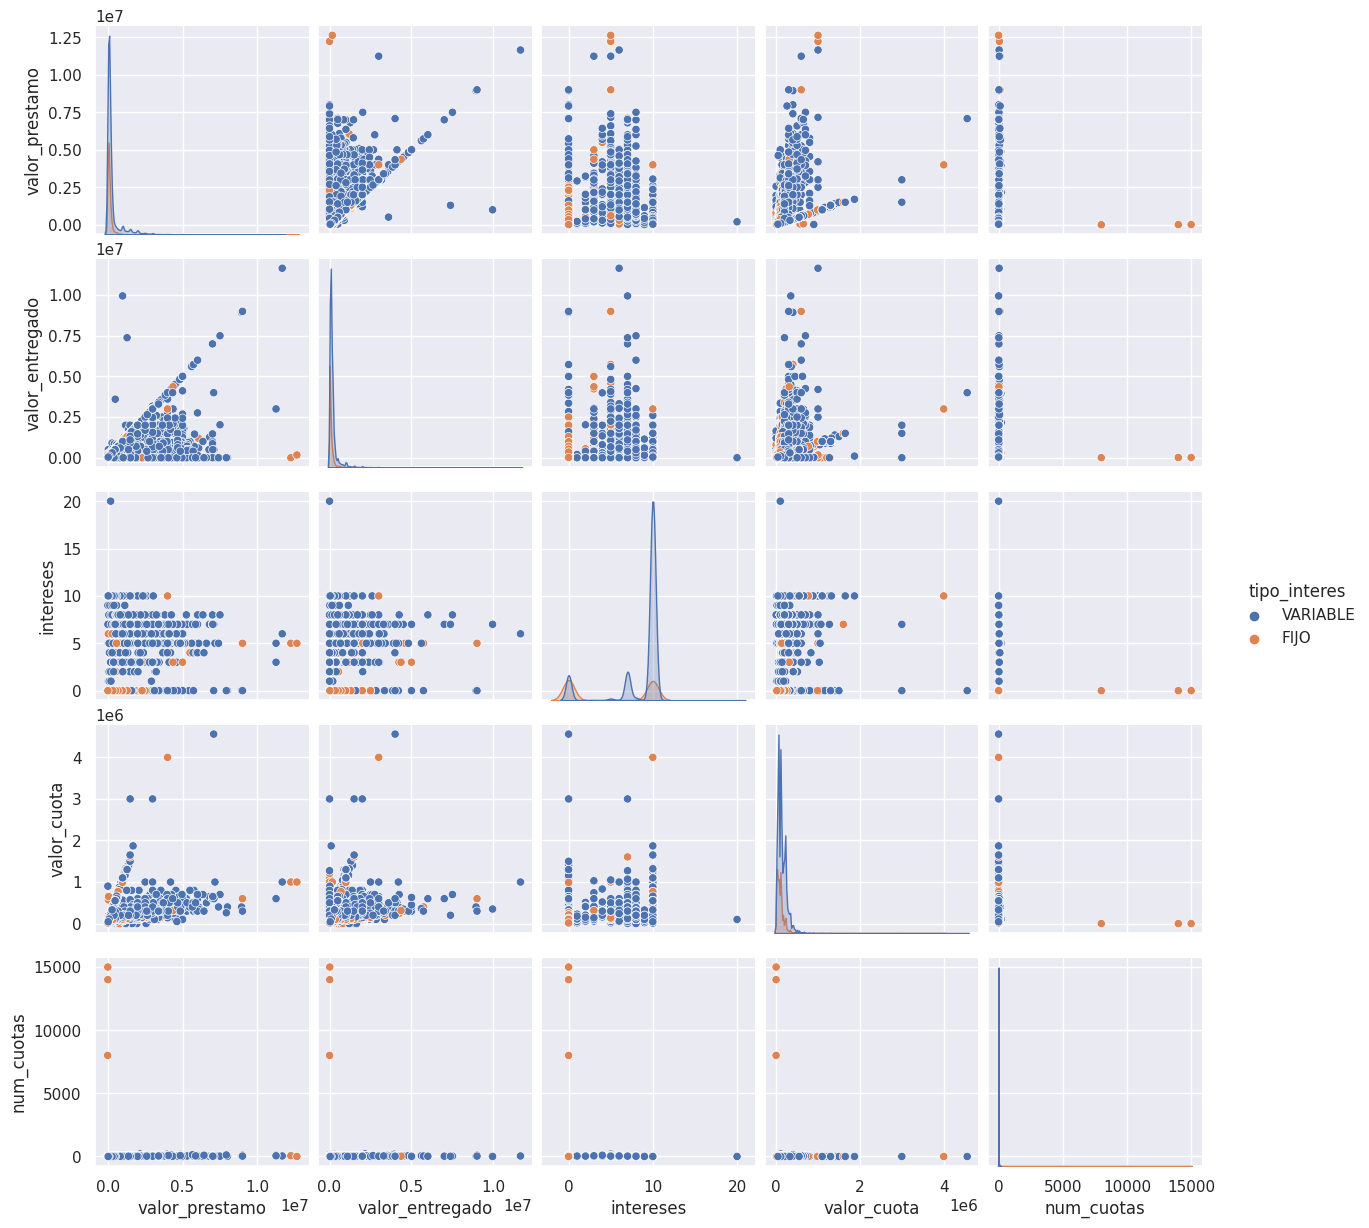

In [934]:
sns.pairplot(data = df_prestamo[['valor_prestamo','valor_entregado','intereses','valor_cuota','num_cuotas','tipo_interes']], hue='tipo_interes')

En el pairplot anterior miramos que en la última fila, que es el numero de cuotas (variable num_cuotas) registra 3 puntos muy lejos del resto de los datos, es decir son outliers.
En la seguiente celda mostraremos esos registros para analizar cuál es la posible causa de estos valores tan extremos.

In [935]:
df_prestamo[df_prestamo['num_cuotas']>5000]

num_prestamo  valor_prestamo  ...  cod_cliente  valorfinalprestamo
24041         25965          4000.0  ...         1405                 0.0
24091         26018         14000.0  ...         1087                 0.0
25108         27060         15000.0  ...         1737                 0.0

[3 rows x 14 columns]

Al mirar los valores de las columnas que hay en los registros mostrados anteriormente, podemos ver que existe un truncamiento de valores, entre la columna valor_cuota y num_cuotas, que tal vez se debe a un error de digitación.

Como porcedimiento para corregir dichos datos, eliminaremos estas filas

In [936]:
df_prestamo.drop(labels=[24041,24091,25108],axis =0,inplace = True)
df_prestamo[df_prestamo['num_cuotas']>5000]

Empty DataFrame
Columns: [num_prestamo, valor_prestamo, valor_entregado, intereses, valor_cuota, num_cuotas, cuotas_pen, tipo_interes, forma_pago, tipo_prestamo, estado_prestamo, fecha_prestamo, cod_cliente, valorfinalprestamo]
Index: []

#Obtener Variable Objetivo

Por parte de la empresa obtuve un archivo en excel, donde se relacionan los créditos que están en mora y al unir este dataset con el de créditos (df_prestamo) que se creó anteriormente obtendremos la variable objetivo, la cual nos dirá si el crédito está en mora o no.

In [937]:
#NUEVO DATASFRAME DE LOS CREDITOS QUE ESTAN EN MORA

df_mora = pd.read_excel('/content/drive/MyDrive/Data Science Acamica/Sprint 1/Proyecto/CLIENTES EN MORA.xlsx',skiprows=3)
df_mora.head()

CEDULA  COD CLIENTE  ... TIPO PRESTAMO          NOTA
0  72126618         2469  ...     PRINCIPAL  orlando pere
1  72126618         2469  ...     MERCANCIA   producvtyod
2  72126618         2469  ...      ANTICIPO   NO DEVOLVER
3   8749704         2149  ...     PRINCIPAL           NaN
4   7445282         2584  ...     PRINCIPAL           NaN

[5 rows x 9 columns]

En el siguiente dataset tenemos los créditos que están en mora, este
dataframe lo uniremos con el de préstamos para así toda la información y sacar conclusiones.

In [938]:
#Nombre de las columnas
df_mora.columns

Index(['CEDULA', 'COD CLIENTE', 'NOMBRE_CLIENTE', '# PRESTAMO', 'FECHA_U_P',
       '# DIAS M', 'SALDO PRESTAMO', 'TIPO PRESTAMO', 'NOTA'],
      dtype='object')

In [939]:
#Dimensiones del dataframe
df_mora.shape

(1428, 9)

In [940]:
#Valor null por columna
df_mora.isnull().sum()

CEDULA               0
COD CLIENTE          0
NOMBRE_CLIENTE       0
# PRESTAMO           0
FECHA_U_P            0
# DIAS M             0
SALDO PRESTAMO       0
TIPO PRESTAMO        0
NOTA              1001
dtype: int64

In [941]:
#renombramos algunas columnas para trabajar mas fácil con ellas mas adelante
df_mora = df_mora.rename(columns={'COD CLIENTE':'cod_cliente',
                                   '# PRESTAMO':'num_prestamo',
                                  'TIPO PRESTAMO':'tipo_prestamo',
                                  'SALDO PRESTAMO':'saldo_prestamo',
                                  '# DIAS M':'dias_mora'})
                         

df_mora.columns

Index(['CEDULA', 'cod_cliente', 'NOMBRE_CLIENTE', 'num_prestamo', 'FECHA_U_P',
       'dias_mora', 'saldo_prestamo', 'tipo_prestamo', 'NOTA'],
      dtype='object')

In [942]:
#eliminamos columnas que contienen informacion personal de los clientes y
#otras que ya existen en el dataframe 'df_prestamo'
df_mora.drop(columns=['cod_cliente','CEDULA','NOMBRE_CLIENTE','FECHA_U_P','tipo_prestamo','NOTA'], inplace=True)
df_mora.columns

Index(['num_prestamo', 'dias_mora', 'saldo_prestamo'], dtype='object')

In [943]:
df_mora.shape

(1428, 3)

In [944]:
df_mora.dtypes

num_prestamo        int64
dias_mora           int64
saldo_prestamo    float64
dtype: object

Después de depurar el dataframe 'df_mora' obtenemos 3 columnas:

-num_prestamo: Cópigo con el cual se identifica el crédito.

-dias_mora: Dias que tiene el crédito de estar en mora.

-saldo_prestamo: Valor del crédito que quedó pendiente por pagar.


In [945]:
#unimos los dataframe 'df_prestamo' y 'df_mora', en la columna en comun que es 'num_prestamo'

df_prestamo= pd.merge(df_prestamo, df_mora, how='left', on='num_prestamo')

In [946]:
#Crearemos una nueva columna para identificar los prestamos que estan en mora, apartir de la columna dias mora,
#es decir, si tienen valores en la columna dias_mora se asignara el valor de 1 en la nueva columna,
#sino se agregara 0 en la nueva columna
df_prestamo['mora'] = np.where(df_prestamo['dias_mora'].isnull(), 0, 1)

#**VARIABLE OBJETIVO**

Para poder analizar todos los datos que tenemos e identificar los créditos en mora, creamos una nueva columna con valores 1 para créditos en mora y 0 para los que no.
Por cual tomaremos dicha columna como variable objetivo:

# df_prestamo.mora = Variable objetivo

Y a partir de esta columna analizaremos todos los datos presentes en el dataframe y asi determinar relaciones, patrones, comportamientos u otros aspectos que nos permitan detectar, clasificar o predecir si un crédito puede o no llegar a estar en mora.

Teniendo en cuenta que podria ir agregando mas datos, de otras tablas de la base de datos, si en un caso dado los datos que hay no son suficientes.

Nota: También hay posibilidad que los datos que tenemos no sean suficientes para tener un EDA exitoso.

In [947]:
df_prestamo.head()

num_prestamo  valor_prestamo  ...  saldo_prestamo  mora
0          1340        230000.0  ...             NaN     0
1          1341        440000.0  ...        240800.0     1
2          1342       1000000.0  ...             NaN     0
3          1343        200000.0  ...             NaN     0
4          1344        313794.0  ...             NaN     0

[5 rows x 17 columns]

In [948]:
# Nuevo shape
df_prestamo.shape

(80995, 17)

In [949]:
#Nombres de las columnas
df_prestamo.columns

Index(['num_prestamo', 'valor_prestamo', 'valor_entregado', 'intereses',
       'valor_cuota', 'num_cuotas', 'cuotas_pen', 'tipo_interes', 'forma_pago',
       'tipo_prestamo', 'estado_prestamo', 'fecha_prestamo', 'cod_cliente',
       'valorfinalprestamo', 'dias_mora', 'saldo_prestamo', 'mora'],
      dtype='object')

In [950]:
#valores nulos por columna
df_prestamo.isnull().sum()

num_prestamo              0
valor_prestamo            0
valor_entregado           0
intereses                 0
valor_cuota               0
num_cuotas                0
cuotas_pen                0
tipo_interes              0
forma_pago                0
tipo_prestamo             0
estado_prestamo           0
fecha_prestamo            0
cod_cliente               0
valorfinalprestamo        0
dias_mora             79567
saldo_prestamo        79567
mora                      0
dtype: int64

Luego de unir los dataset observamos que hay 2 variables (dias_mora y saldo_prestamo) que tienen una gran cantidad de valores nulos, esto se da por que el primer dataframe (df_prestamo) no contaba con estas columnas y por lo tanto pandas por defecto le asigna valores nulos.

In [951]:
#rellenamos los valores falantes en las columnas 'dias mora' y 'saldo_prestamo' con ceros
df_prestamo.dias_mora.fillna(value=0, inplace=True)
df_prestamo.saldo_prestamo.fillna(value=0, inplace=True)
df_prestamo.isnull().sum()

num_prestamo          0
valor_prestamo        0
valor_entregado       0
intereses             0
valor_cuota           0
num_cuotas            0
cuotas_pen            0
tipo_interes          0
forma_pago            0
tipo_prestamo         0
estado_prestamo       0
fecha_prestamo        0
cod_cliente           0
valorfinalprestamo    0
dias_mora             0
saldo_prestamo        0
mora                  0
dtype: int64

In [952]:
 #Obtenemos correlaciones
 correlacion = df_prestamo.corr()

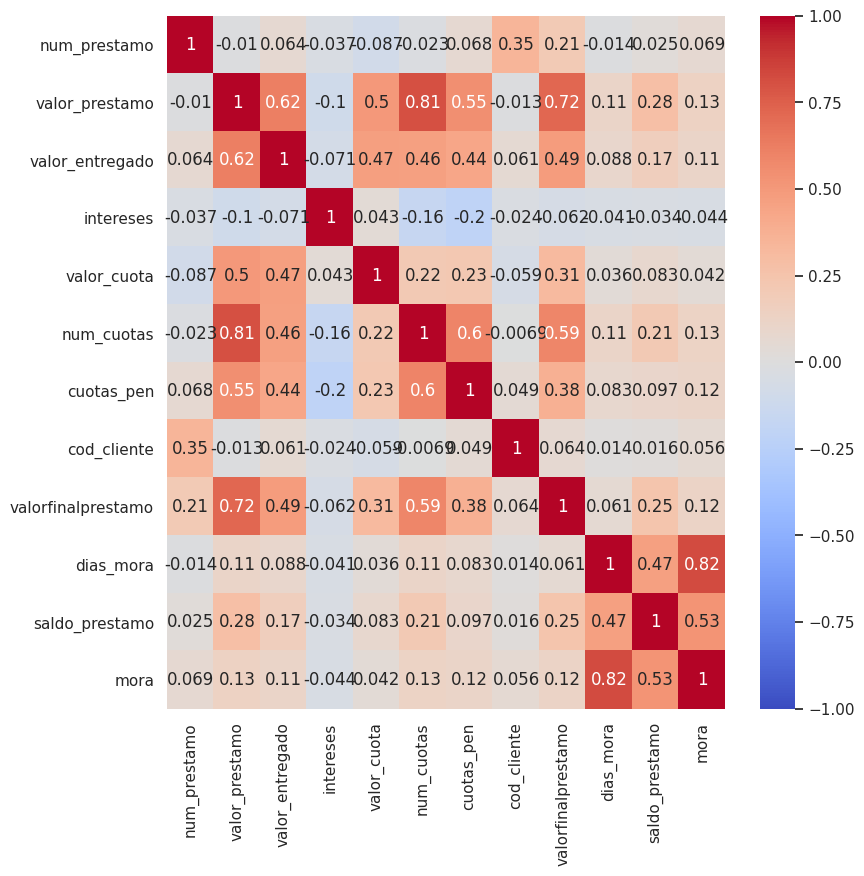

In [953]:
plt.figure(figsize=(9,9))
sns.heatmap(data=correlacion,annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.show();
#sns.heatmap(data=correlacion,annot=True,cmap='coolwarm')

Con esta grafica de correlaciones nos enfocaremos en las correlaciones fuertes tanto negativas (que no hay) como positivas e iremos interpretanto y descartanto segun el caso y miraremos mas a fondo aquellas de las que se puedan llegar a sacar concluciones.

La Variable Objetivo no tiene correlacion significativa con alguna otra variable aparte de las que provienen del dataset mora, debido a que dicha variable creó a partir de la variable dias_mora.

Algunas correlaciones fuertes por destacar son:

- valor prestamo con numero de cuotas (0.82)
- valor final prestado con numero de cuotas (0.59)
- valor prestado con valor entregado (0.62)

En este punto de mi análisis algunas correlaciones que aunque pueden estar crecanas a 0.5 y que a simple vista pueden ser interesantes, no las voy canalizar porque no tienen una relacion considerable con la variable objetivo.

Nota: Mas adelante podriamos llegar a una conclusión diferente.

# **Con las siguientes gráficas mostraré el comportamiento de la variable objetivo con respecto a otras variables**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


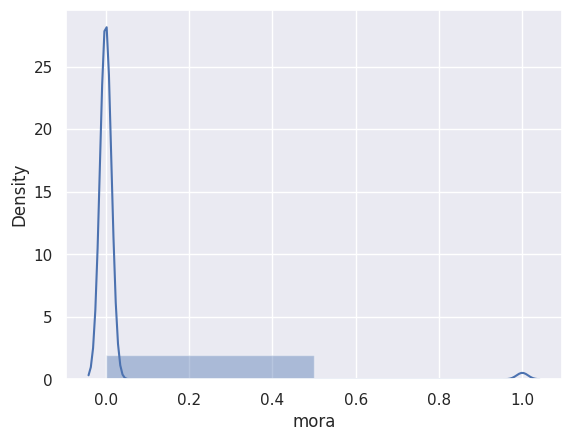

In [954]:
sns.distplot(df_prestamo['mora'], bins=2 );

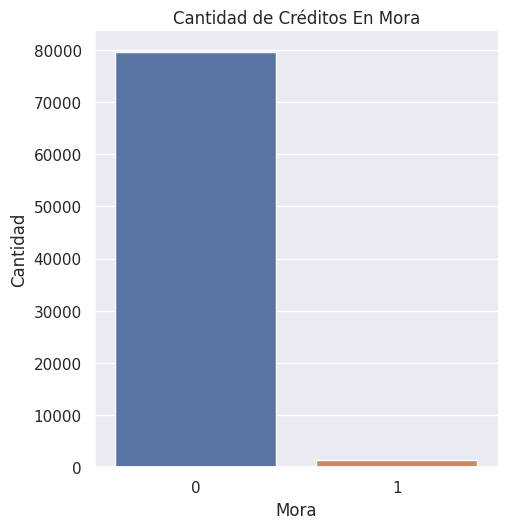

In [955]:
# cantidad de créditos en mora (1) y no mora (2)
sns.catplot(data= df_prestamo,x='mora',kind='count')
plt.title('Cantidad de Créditos En Mora')
plt.xlabel('Mora')
plt.ylabel('Cantidad')
plt.show();

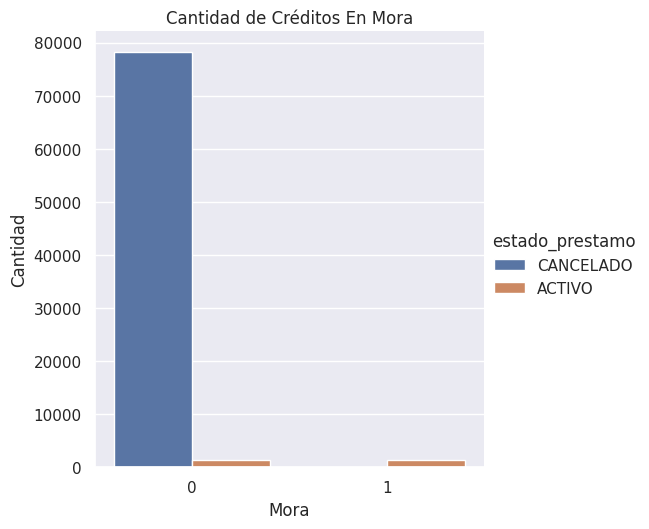

In [956]:
# cantidad de créditos en mora (1) y no mora (2)
sns.catplot(data= df_prestamo,x='mora', hue='estado_prestamo',kind='count')
plt.title('Cantidad de Créditos En Mora')
plt.xlabel('Mora')
plt.ylabel('Cantidad')
plt.show();

De la grafica anterior podemos ver que en los creditos en mora no hay creditos cancelados, por tanto podriamos inferir que todos los creditos que estan en mora pertenecen a la clase creditos activos.
Para corrrobar dicha hipotesis intentaremos agrupar, por estado de prestamo y por mora, donde contaremos cada valor que pertenece a esta agrupacion.

In [957]:
df_prestamo.groupby((['mora','estado_prestamo']))[['mora']].count()

mora
mora estado_prestamo       
0    ACTIVO            1385
     CANCELADO        78182
1    ACTIVO            1428

Con la agrupacion anterior podemos ver como la hipotesis que se planteo anteriormente, resulto ser cierta. Debido a que encontramos un subsegmentacion interesante hallaremos correlaciones en esta segmentacion y si encontramos alguna correlacion interesante analizaremos su comportamiento.

In [958]:
#creamos un nuevo dataframe solo con los creditos que estan activos.
df_activo = df_prestamo[df_prestamo['estado_prestamo']=='ACTIVO']
df_activo.shape

(2813, 17)

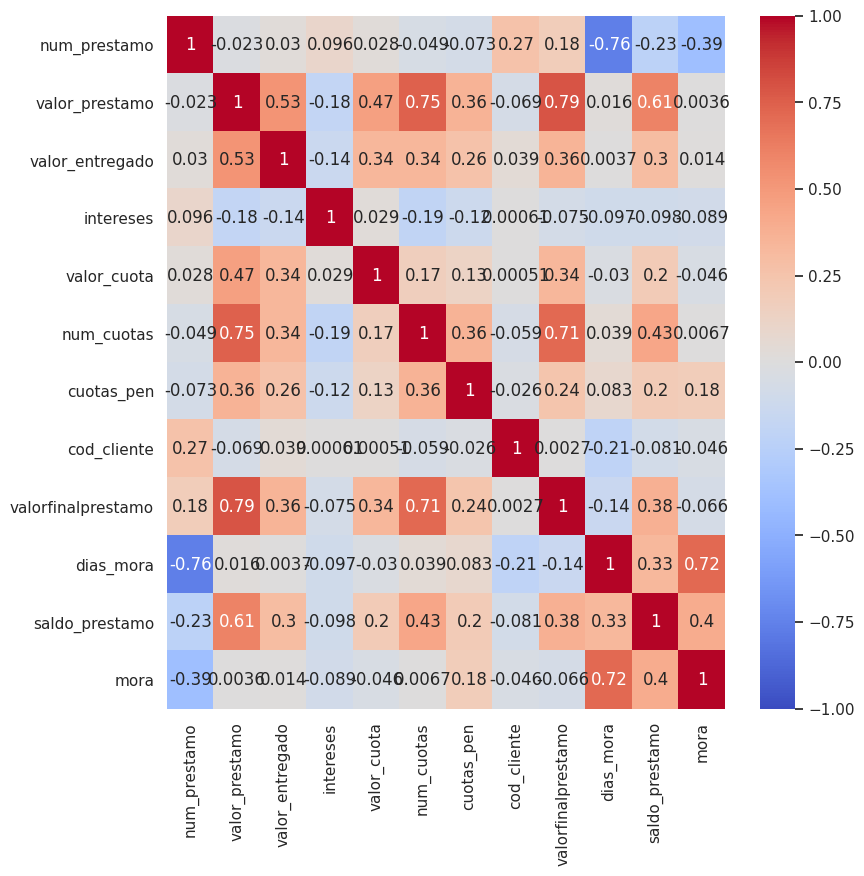

In [959]:
#grafica de correlacion del dataframe activo
plt.figure(figsize=(9,9))
sns.heatmap(data=df_activo.corr(),annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.show();

De la grafica anterior no encontramos ninguna correlacion interesante con respecto a la variable objetivo ('mora'), excepto aquellas que originalemnte pertenecen al dataset 'df_mora'

In [960]:
dm = df_prestamo.groupby(('mora'))[['valor_prestamo']].agg(['count','mean'])
dm

valor_prestamo               
              count           mean
mora                              
0             79567  260268.365893
1              1428  829179.939776

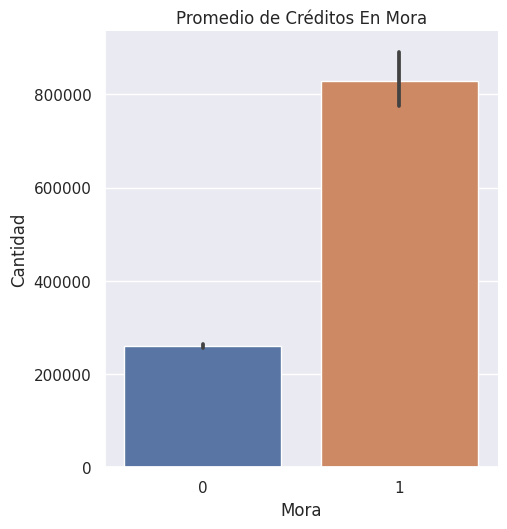

In [961]:
#promedio de créditos por mora y no mora
sns.catplot(data= df_prestamo,x='mora', y='valor_prestamo',kind='bar')
plt.title('Promedio de Créditos En Mora')
plt.xlabel('Mora')
plt.ylabel('Cantidad')
plt.show();

De lo anterior podemos ver como apesar de tener una menor cantidad de créditos la clase mora = 1, tienen un promedio de  valor de crédito mas alto.

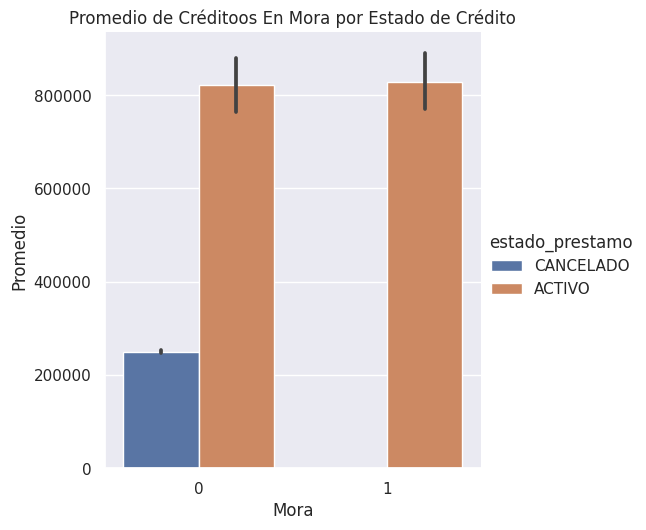

In [962]:
sns.catplot(data= df_prestamo,x='mora', y='valor_prestamo',hue='estado_prestamo',kind='bar')
plt.title('Promedio de Créditoos En Mora por Estado de Crédito')
plt.xlabel('Mora')
plt.ylabel('Promedio')
plt.show();

De esta grafica anterior vemos como tanto los creditos en mora como los que no estan en mora poseen un promedio y desviacion estandar muy similar.

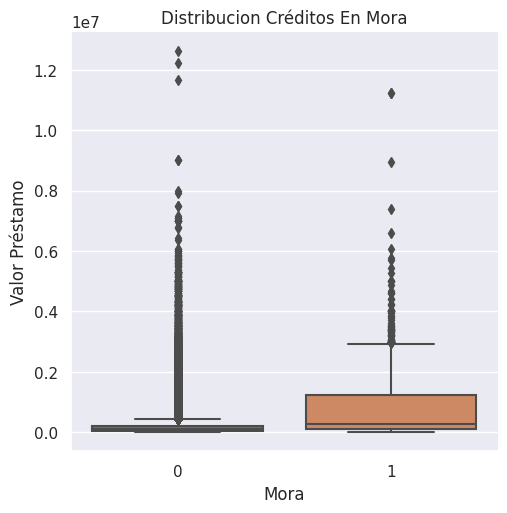

In [963]:
sns.catplot(data= df_prestamo,x='mora',y='valor_prestamo',kind='box')
plt.title('Distribucion Créditos En Mora')
plt.xlabel('Mora')
plt.ylabel('Valor Préstamo')
plt.show();

Aunque la cantidad de creditos que NO estan en mora es muy grande con respecto a los que estan en mora, vemos como la grafica de los que estan en mora esta un poco mas amplia su zona intercuartil, lo que quiere decir que los valores de los creditos tienen un rango mas amplio, exectuando los outliers.

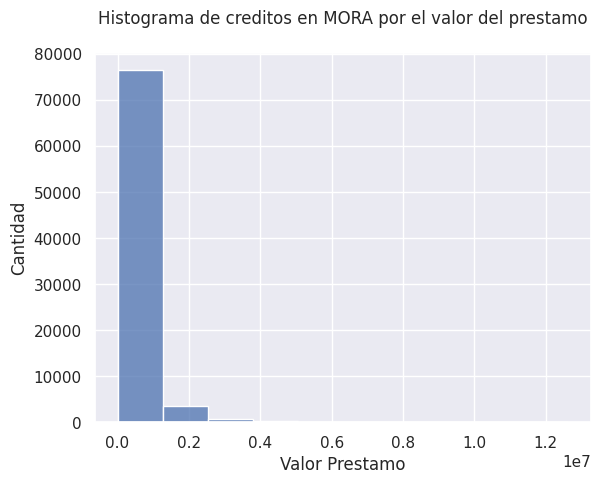

In [964]:
#histograma de todos los creditos
sns.histplot(data=df_prestamo, x='valor_prestamo',bins=10)
plt.title('Histograma de creditos en MORA por el valor del prestamo\n')
plt.xlabel('Valor Prestamo')
plt.ylabel('Cantidad')
plt.show();

En el histograma anterior vemos como la gran mayoria de los creditos se encuentran en valores de 0 a 300 mil pesos

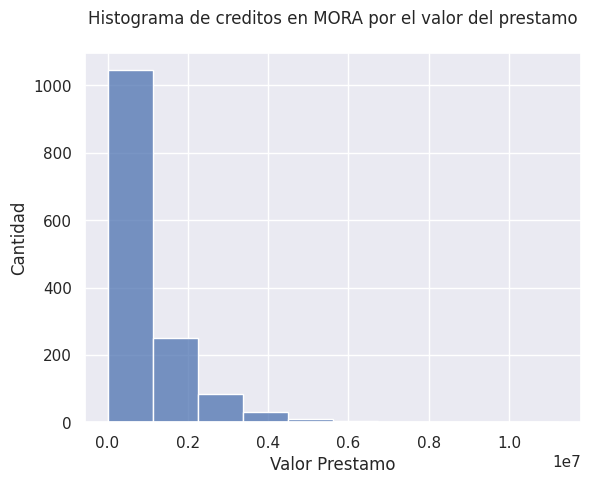

In [965]:
#histograma de creditos en mora
sns.histplot(data=df_prestamo[df_prestamo['mora']==1], x='valor_prestamo',bins=10)
plt.title('Histograma de creditos en MORA por el valor del prestamo\n')
plt.xlabel('Valor Prestamo')
plt.ylabel('Cantidad')
plt.show();

De igual forma al histograma de todos los creditos podemos ver como el histograma de los creditos en mora se comporta de la misma manera, donde una gran cantidad de creditos se encuentra entre valores pequeños

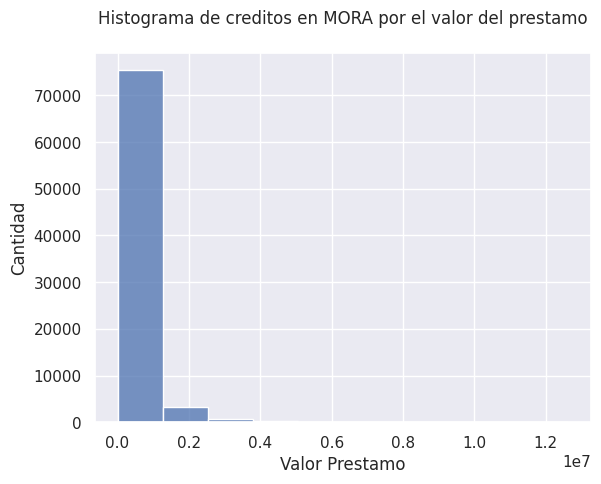

In [966]:
#histograma de creditos en NO mora
sns.histplot(data=df_prestamo[df_prestamo['mora']==0], x='valor_prestamo',bins=10)
plt.title('Histograma de creditos en MORA por el valor del prestamo\n')
plt.xlabel('Valor Prestamo')
plt.ylabel('Cantidad')
plt.show();

Igual que en los histogramas anteriores una gran cantidad de prestamos se agrupan en los valores mas pequeños.


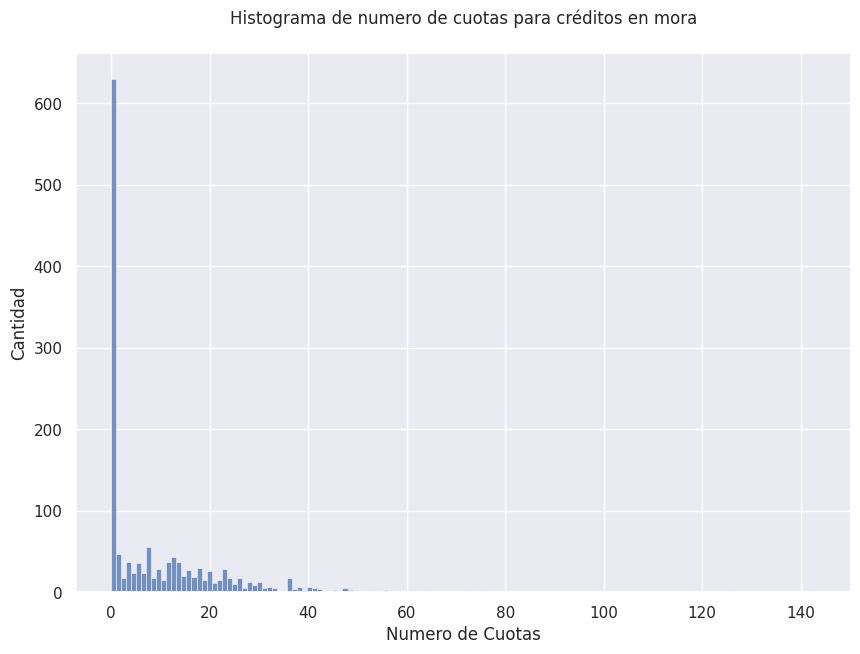

In [967]:
#histograma de creditos en Mora por numero de cuotas
plt.subplots(figsize = (10, 7))
sns.histplot(data=df_prestamo[df_prestamo['mora']==1], x='num_cuotas',bins=140)
plt.title('Histograma de numero de cuotas para créditos en mora\n')
plt.xlabel('Numero de Cuotas')
plt.ylabel('Cantidad')
plt.show();

Del histograma anterior vemos como una gran parte de los creditos que estan en mora se encuentran en valores de una sola cuota, lo caul comunicare al experto de negocio para descartar que esto sea por algún proceso interno de la empresa.


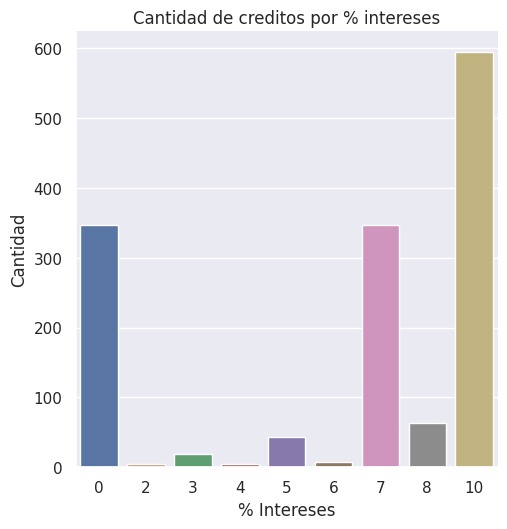

In [968]:
# cantidad de creditos en MORA por porcentaje de intereses
sns.catplot(data=df_prestamo[df_prestamo['mora']==1], x='intereses', kind='count')
plt.title('Cantidad de creditos por % intereses')
plt.xlabel('% Intereses')
plt.ylabel('Cantidad')
plt.show();


Como se puede observar de los creditos que están en mora las tasas de interés que predominan son 10%, 7% y 0% (las que tienen 0% es por que han llegado a una instancia juridica y se les pone 0 al momento de entrar en dicho proceso)

**Este valor de 0% de intereses será evaluado mas adelante para detectar si efectivamente corresponde a lo dicho**

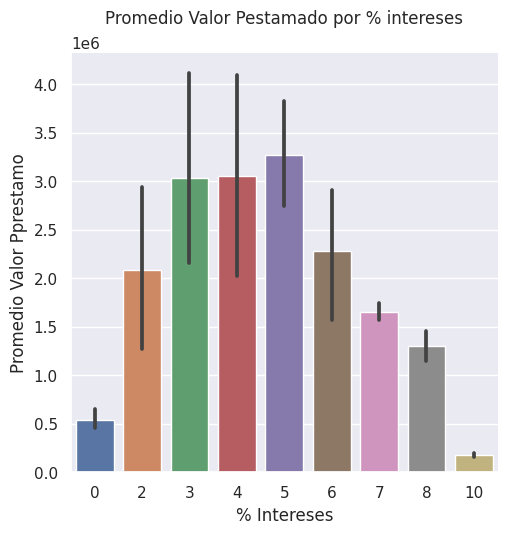

In [969]:
# Promedio valor de  creditos en MORA por porcentaje de intereses
sns.catplot(data=df_prestamo[df_prestamo['mora']==1], x='intereses', y='valor_prestamo' , kind='bar')
plt.title('Promedio Valor Pestamado por % intereses\n')
plt.xlabel('% Intereses')
plt.ylabel('Promedio Valor Pprestamo')
plt.show();


Podemos ver como el promedio de valor del préstamo se vuelve mas bajo en los % de intereses que tienen mas préstamos y en los % de interes que contienen menos cantidad de créditos como lo son 2, 3, 4, 5 y 6 los promedios son mas altos.

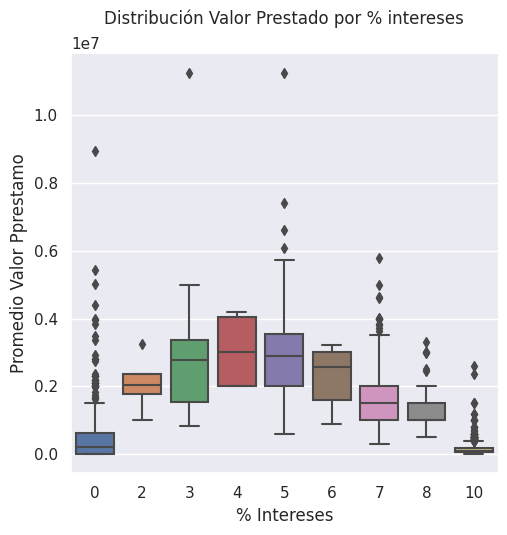

In [970]:
# Distribucion del valor creditos en MORA por porcentaje de intereses
sns.catplot(data=df_prestamo[df_prestamo['mora']==1], x='intereses', y='valor_prestamo' , kind='box')
plt.title('Distribución Valor Prestado por % intereses\n')
plt.xlabel('% Intereses')
plt.ylabel('Promedio Valor Pprestamo')
plt.show();

Se puede observar para los valores de 0% y 10% la mayoria de los créditos se encuentran en valores menores a 100 mil pesos.
Nótese para los intereses  4 y 6 % no existen valores del rango intercuartil, esto se da porque hay una cantidad de créditos muy bajos para estos % y al parecer son los mismo valores de prestamos.

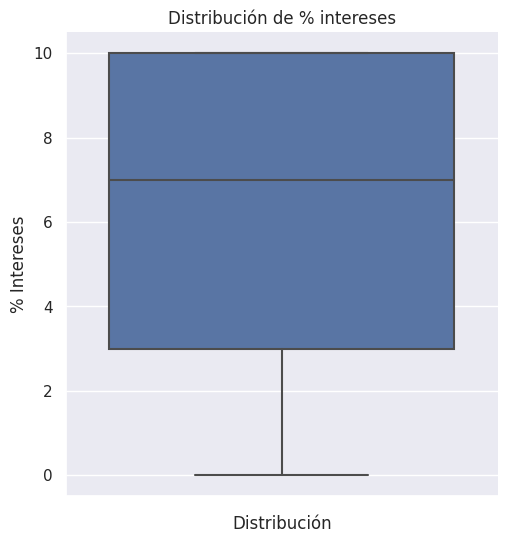

In [971]:
#distribución e intereses en MORA
sns.catplot(data=df_prestamo[df_prestamo['mora']==1], y='intereses', kind='box')
plt.title('Distribución de % intereses')
plt.xlabel('Distribución')
plt.ylabel('% Intereses')
plt.show();

Observamos como se comportan de forma general los % de intereses.

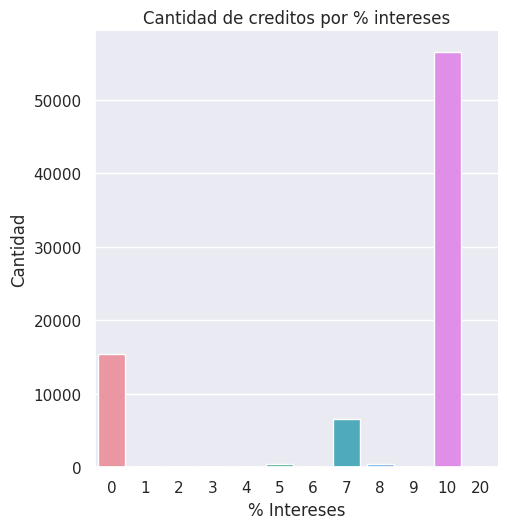

In [972]:
# cantidad de creditos en NO MORA por porcentaje de intereses
sns.catplot(data=df_prestamo[df_prestamo['mora']==0], x='intereses', kind='count')
plt.title('Cantidad de creditos por % intereses')
plt.xlabel('% Intereses')
plt.ylabel('Cantidad')
plt.show();

Esta grafica a rangos grandes podria ser muy parecida a la anterior donde los % de interes como 0, 7 y 10 son los que mas cantidad de intereses tienen. Y vemos como aparece un nuevo %, el cual coresponde al 20 y contiene una muy puqueña cantidad de créditos.

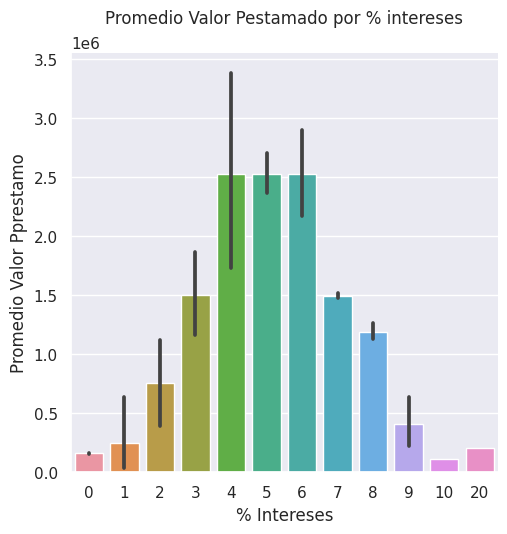

In [973]:
# Promedio valor de creditos en NO MORA por porcentaje de intereses
sns.catplot(data=df_prestamo[df_prestamo['mora']==0], x='intereses', y='valor_prestamo' , kind='bar')
plt.title('Promedio Valor Pestamado por % intereses\n')
plt.xlabel('% Intereses')
plt.ylabel('Promedio Valor Pprestamo')
plt.show();

Con esta grafica vemos como los % de interes que presentan un mayor promedio de valor de préstamo son 4, 5 y 6 pero estos son los % que presentan una menor cantidad de préstamos.

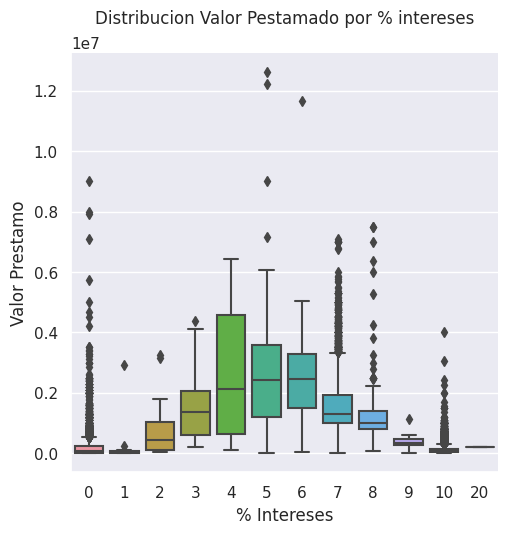

In [974]:
# Distribucion valor creditos en NO MORA por porcentaje de intereses
sns.catplot(data=df_prestamo[df_prestamo['mora']==0], x='intereses', y='valor_prestamo' , kind='box')
plt.title('Distribucion Valor Pestamado por % intereses\n')
plt.xlabel('% Intereses')
plt.ylabel('Valor Prestamo')
plt.show();

Al igual que en la grafica de caja de los creditos en mora, en esta los % con mayor cantidad de préstamos (0 y 10%) tienen sus valores en un rango mas pequeño, es decir estan mas concentrados que los otros %.

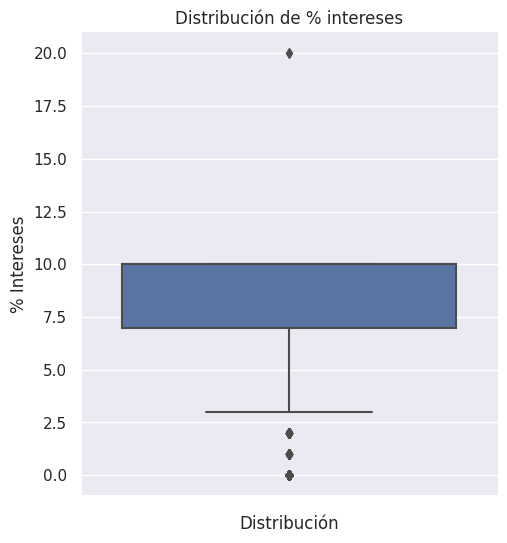

In [975]:
#distribución e intereses en NO MORA
sns.catplot(data=df_prestamo[df_prestamo['mora']==0], y='intereses', kind='box')
plt.title('Distribución de % intereses')
plt.xlabel('Distribución')
plt.ylabel('% Intereses')
plt.show();

Como se pude observar para los préstamos que no estan en mora, los intereses que predominan estan entre 7% y 10%

Valor entregado: Es el valor que es entregado al cliente en efectivo.

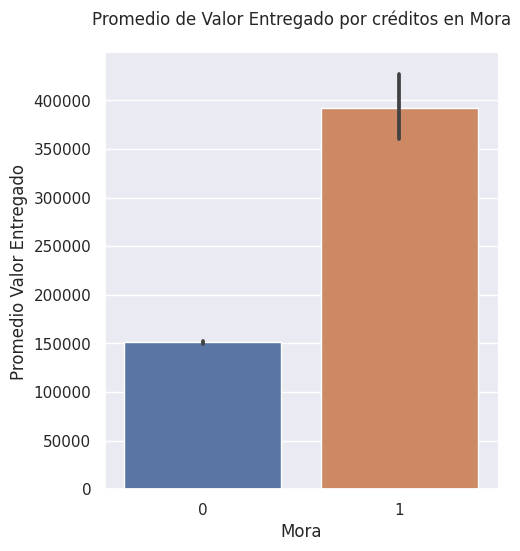

In [976]:
#Valor entregado con respecto a la variable objetivo
sns.catplot(data=df_prestamo, x='mora', y='valor_entregado', kind='bar')
plt.title('Promedio de Valor Entregado por créditos en Mora\n')
plt.xlabel('Mora')
plt.ylabel('Promedio Valor Entregado')
plt.show();

Con lo que vemos en la grafica que muy claro que el promedio de valor entregado por creditos en mora es mayor que el promedio de los créditos que no estan en mora.

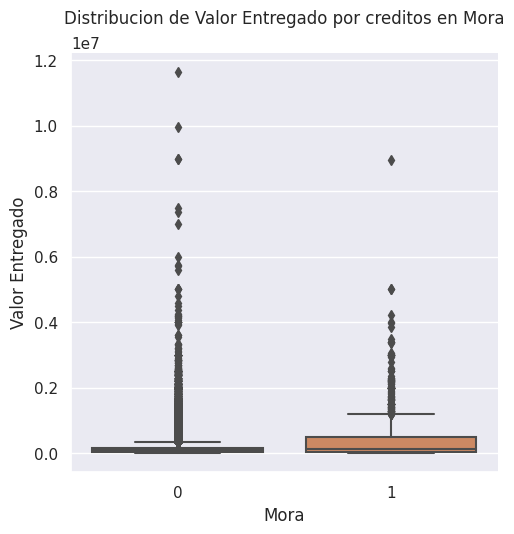

In [977]:
#Distribucion Valor entregado con respecto a la variable objetivo
sns.catplot(data=df_prestamo, x='mora', y='valor_entregado', kind='box')
plt.title('Distribucion de Valor Entregado por creditos en Mora\n')
plt.xlabel('Mora')
plt.ylabel('Valor Entregado')
plt.show();

Aunque tienen una distribución muy parecida, los creditos en mora estan un poco menos concentrados que los créditos que no estan en mora.

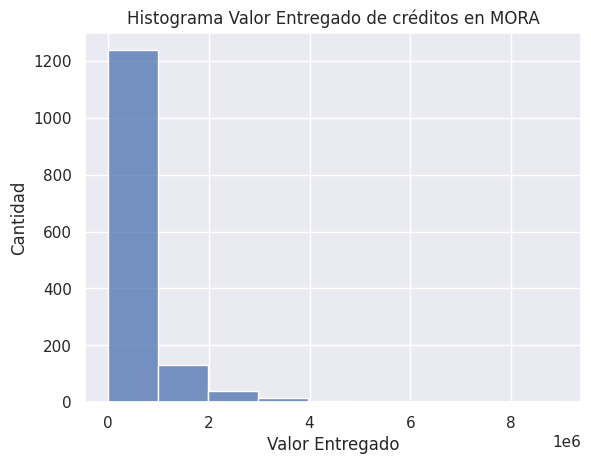

In [978]:
#histograma valor entregado por creditos en mora
sns.histplot(data=df_prestamo[df_prestamo['mora']==1], x='valor_entregado', bins=9)
plt.title('Histograma Valor Entregado de créditos en MORA')
plt.xlabel('Valor Entregado')
plt.ylabel('Cantidad')
plt.show();

Histograma para ver la frecuencia que tienen los valores entregados para los creditos que estan en mora.

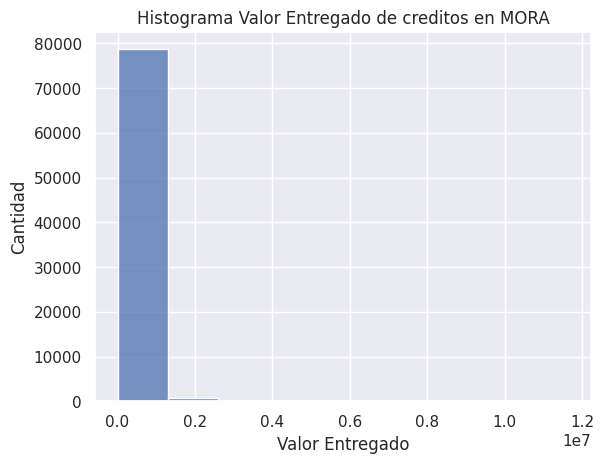

In [979]:
#histograma valor entregado por creditos en NO mora
sns.histplot(data=df_prestamo[df_prestamo['mora']==0], x='valor_entregado', bins=9)
plt.title('Histograma Valor Entregado de creditos en MORA')
plt.xlabel('Valor Entregado')
plt.ylabel('Cantidad')
plt.show();

Un porcentaje muy alto de los creditos que no estan en mora, el valor entregado se encuentra entre 0 y 133 mil pesos, como podemos ver en la grafica anterior.

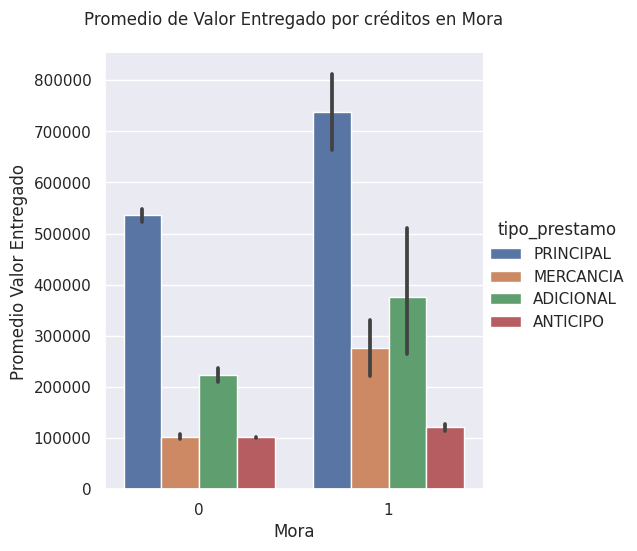

In [980]:
# promedio Valor entregado con respecto a la variable objetivo por tipo de préstamo
sns.catplot(data=df_prestamo, x='mora', y='valor_entregado',hue='tipo_prestamo', kind='bar')
plt.title('Promedio de Valor Entregado por créditos en Mora\n')
plt.xlabel('Mora')
plt.ylabel('Promedio Valor Entregado')
plt.show();

Preocupa de los creditos que están en mora para el tipo de prestamo principal (efectivo) tiene un promedio de valor préstamo de aproximadamente 750 mil pesos. Que es un rango muy alto con respecto a los demas tipos de prestamos.

En ambas graficas tanto para los préstamos en mora como los que no, el promedio de los tipos de prestamos se comporta similar, donde el mayor promedio es principal, luego adicional, posteriormente mercancia y por ultimó anticipo.

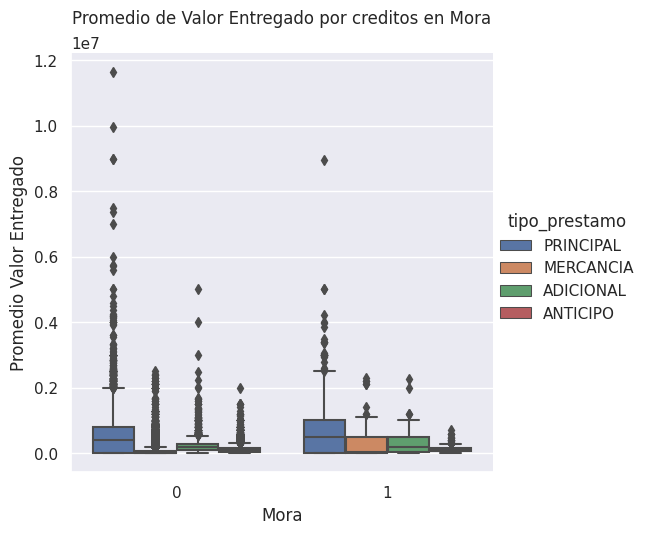

In [981]:
#Distribucion de Valor entregado con respecto a la variable objetivo por tipo de prestamo
sns.catplot(data=df_prestamo, x='mora', y='valor_entregado',hue='tipo_prestamo', kind='box')
plt.title('Promedio de Valor Entregado por creditos en Mora\n')
plt.xlabel('Mora')
plt.ylabel('Promedio Valor Entregado')
plt.show();

Use el grafico de cajas para encontrar la distribucion de creditos en mora contra el valor entregado discriminado por los tipos de prestamos.

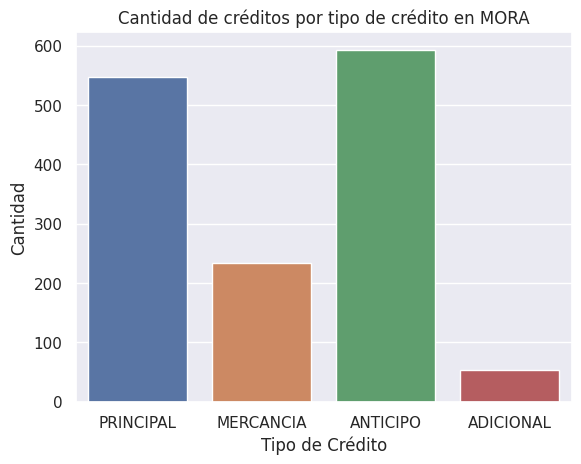

In [982]:
sns.countplot(data=df_prestamo[df_prestamo['mora']==1], x='tipo_prestamo')
plt.title('Cantidad de créditos por tipo de crédito en MORA')
plt.xlabel('Tipo de Crédito')
plt.ylabel('Cantidad')
plt.show();

En estas cantidades vemos como hay un mayor numero anticipos en mora, teniendo en cuenta que con principal no es muy grande la difencia, como si lo es con mercancia y adicional.

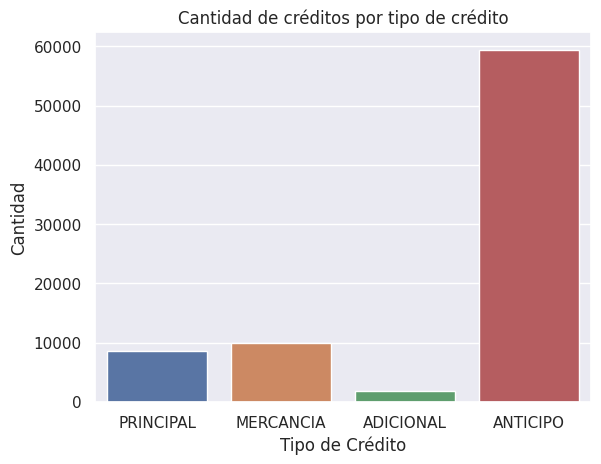

In [983]:
sns.countplot(data=df_prestamo[df_prestamo['mora']==0], x='tipo_prestamo')
plt.title('Cantidad de créditos por tipo de crédito')
plt.xlabel('Tipo de Crédito')
plt.ylabel('Cantidad')
plt.show();

En esta grafica podemos ver como al graficar la cantidad de creditos que NO estan en mora, el tipo anticipo abarca un gran candidad de dicha segmentación.
Y hablando con el experto de negocio me confirmo la informacion obtenida, ya que el anticipo se da cuando el cliente manifiesta que necesita un dinero y este dinero es descontado directamente del proximo pago que se le realice al trabajador, por parte de la empresa en la que labora.

El experto de negocio tambien manifienta que en los créditos en mora ver anticipos es poco común. Ya que la empresa tiene un proceso interno en el cual cuando un cliente entre en mora y el tipo de prestamo es anticipio (puede ser un préstamo o varios) se realiza un pago ficticio, para cambiar de estado activo a cancelado dicho préstamo y luego se crea un préstamo tipo principal, donde si cuenta con varios se unican.  

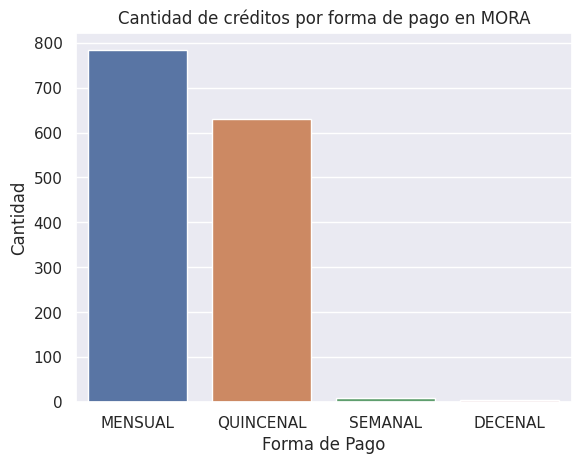

In [984]:
sns.countplot(data=df_prestamo[df_prestamo['mora']==1], x='forma_pago')
plt.title('Cantidad de créditos por forma de pago en MORA')
plt.xlabel('Forma de Pago')
plt.ylabel('Cantidad')
plt.show();

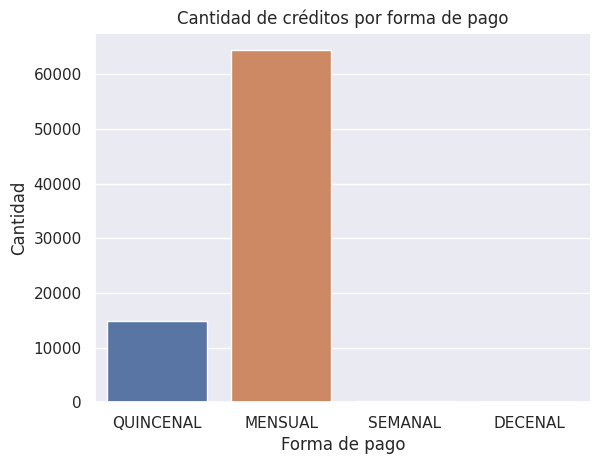

In [985]:
sns.countplot(data=df_prestamo[df_prestamo['mora']==0], x='forma_pago')
plt.title('Cantidad de créditos por forma de pago')
plt.xlabel('Forma de pago')
plt.ylabel('Cantidad')
plt.show();

In [986]:
df_prestamo.groupby((['mora','forma_pago']))[['valor_prestamo']].count()

valor_prestamo
mora forma_pago                
0    DECENAL                 99
     MENSUAL              64383
     QUINCENAL            14790
     SEMANAL                295
1    DECENAL                  4
     MENSUAL                783
     QUINCENAL              631
     SEMANAL                 10

Pudimos ver como en las dos graficas anteriores las formas de pago que predominaron fueron quincenal y mensual, debido a que esta es la forma mas común en que una empresa paga el salario a sus empleados.

Y se confirmo dichas concluciones con el experto de negocio.

Nota: Se realizo un groupby para confirmar la cantidad de creditos que aparecen en las formas de pago semanal y decenal ya que en las graficas practicamente no se distinguensi hay o no.

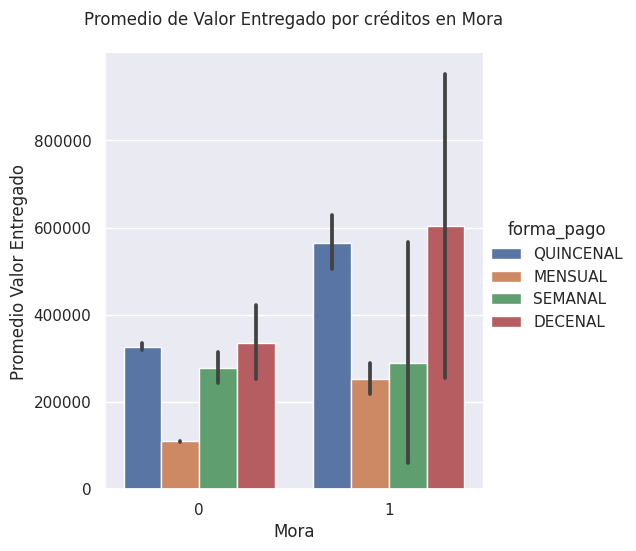

In [987]:
# promedio Valor entregado con respecto a la variable objetivo por forma de pago
sns.catplot(data=df_prestamo, x='mora', y='valor_entregado',hue='forma_pago', kind='bar')
plt.title('Promedio de Valor Entregado por créditos en Mora\n')
plt.xlabel('Mora')
plt.ylabel('Promedio Valor Entregado')
plt.show();

Es interesante o curioso ver como los tipos de creditos que tienen una menor cantidad de créditos son los que tienen una desviacion estandar mas alta. Y la forma de pago decenal tiene un promedio de valor entregado mas mas alto o igual a quiencenal que posee un cantidad de creditos mucho mayor.

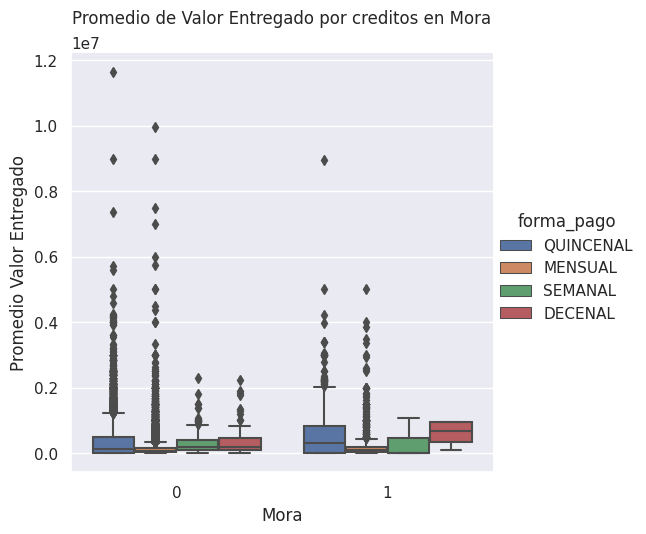

In [988]:
#Distribucion de Valor entregado con respecto a la variable objetivo por foram de pago
sns.catplot(data=df_prestamo, x='mora', y='valor_entregado',hue='forma_pago', kind='box')
plt.title('Promedio de Valor Entregado por creditos en Mora\n')
plt.xlabel('Mora')
plt.ylabel('Promedio Valor Entregado')
plt.show();

Usamos esta grafica de box para ver si se podia encontrar algun comportamiento o patron, pero vemos como la distribución de las formas de pagos con respecto al valor entregado se mueve en un rango pequeño y es normal ya que cuando graficamos el total de valor de creditos la mayoria se encuentran en este mismo intervalo de valores.

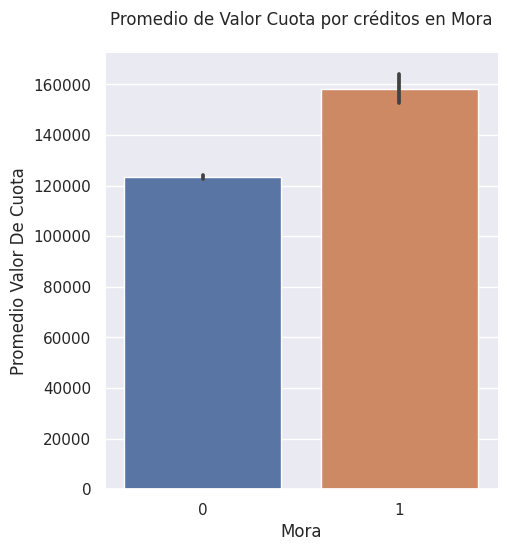

In [989]:
#Valor cuota con respecto a la variable objetivo
sns.catplot(data=df_prestamo, x='mora', y='valor_cuota', kind='bar')
plt.title('Promedio de Valor Cuota por créditos en Mora\n')
plt.xlabel('Mora')
plt.ylabel('Promedio Valor De Cuota')
plt.show();

Encontramos que el promedio de cuota de los créditos en mora es mas alta y tiene una desviacion estandar mas alta que en los créditos que no estan en mora.

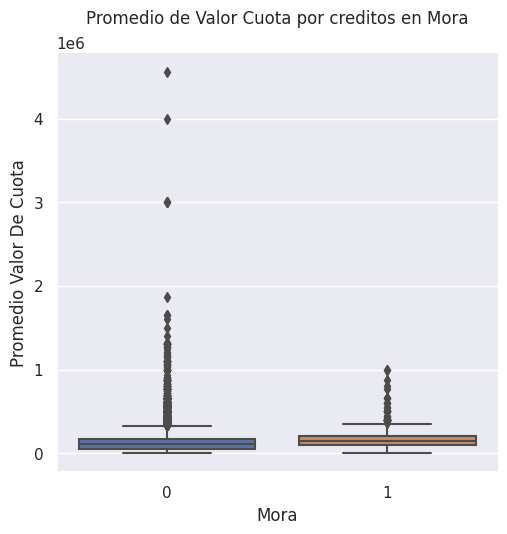

In [990]:
#Valor cuota con respecto a la variable objetivo
sns.catplot(data=df_prestamo, x='mora', y='valor_cuota', kind='box')
plt.title('Promedio de Valor Cuota por creditos en Mora\n')
plt.xlabel('Mora')
plt.ylabel('Promedio Valor De Cuota')
plt.show();

El valor de cuotas se encuentra agrupada en valores pequeños tanto para creditos en mora como los que no.

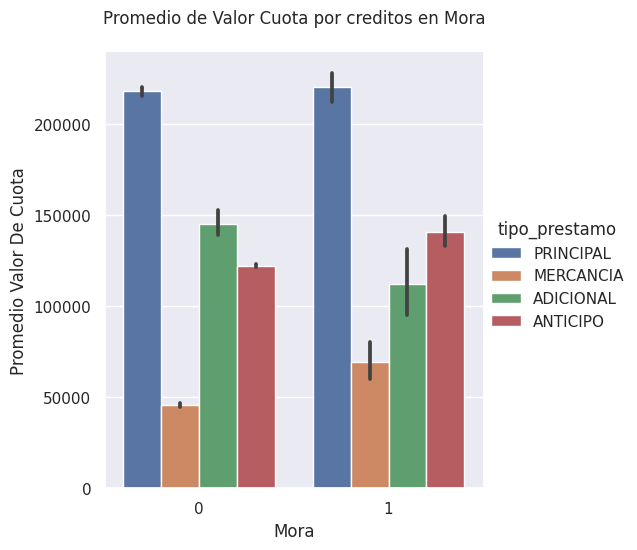

In [991]:
sns.catplot(data=df_prestamo, x='mora', y='valor_cuota',hue='tipo_prestamo', kind='bar')
plt.title('Promedio de Valor Cuota por creditos en Mora\n')
plt.xlabel('Mora')
plt.ylabel('Promedio Valor De Cuota')
plt.show();

Vemos como en los dos casos (mora y no mora) el tipo de prestamo con mayor promedio de valor de cuota es el principal y el mas bajo mercancia.

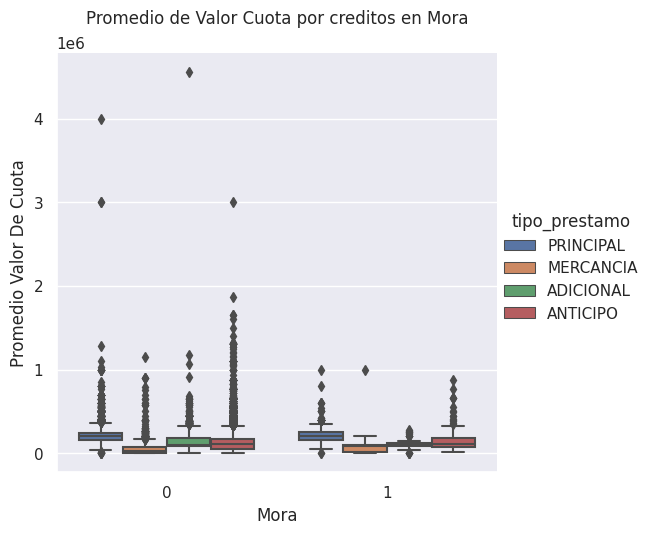

In [992]:
sns.catplot(data=df_prestamo, x='mora', y='valor_cuota',hue='tipo_prestamo', kind='box')
plt.title('Promedio de Valor Cuota por creditos en Mora\n')
plt.xlabel('Mora')
plt.ylabel('Promedio Valor De Cuota')
plt.show();

Podemos ver como para los tipo de prestamo principal su segmentación se encuentra un poco mas alta que en los demas tipos de préstamos, en los dos casos (mora y no mora).

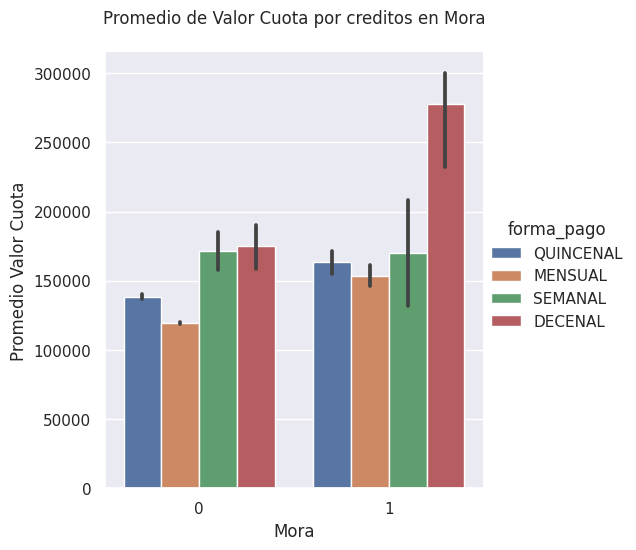

In [993]:
# promedio Valor cuota con respecto a la variable objetivo por forma de pago
sns.catplot(data=df_prestamo, x='mora', y='valor_cuota',hue='forma_pago', kind='bar')
plt.title('Promedio de Valor Cuota por creditos en Mora\n')
plt.xlabel('Mora')
plt.ylabel('Promedio Valor Cuota')
plt.show();

De la anterior grafica podemos darnos cuenta como la forma de pago decenal de los créditos que estan en mora tienen un promedio de cuota mas alto que el resto, inclusive que aquellos que no estan en mora y apesar de que es una de las fromas de pago menos frecuente. 

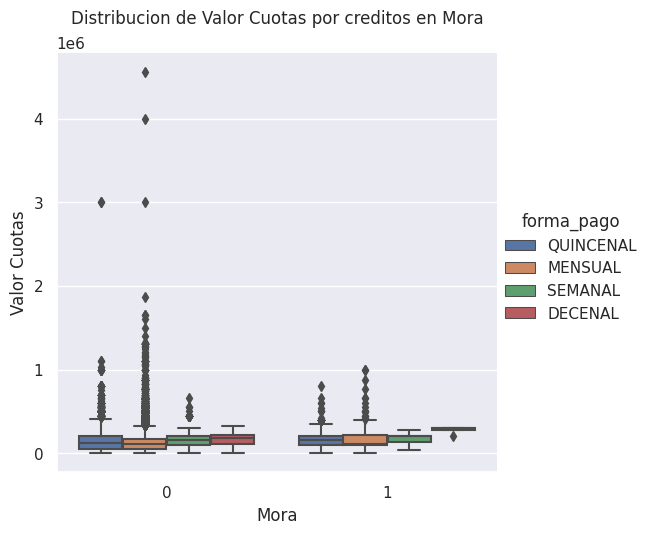

In [994]:
# Distribucion Valor Cuota con respecto a la variable objetivo por forma de pago
sns.catplot(data=df_prestamo, x='mora', y='valor_cuota',hue='forma_pago', kind='box')
plt.title('Distribucion de Valor Cuotas por creditos en Mora\n')
plt.xlabel('Mora')
plt.ylabel('Valor Cuotas')
plt.show();

Al igual que la grafica anterior vemos como la forma de pago decenal de los creditos en mora tiene una segmentacion un poco mas alta que el resto.

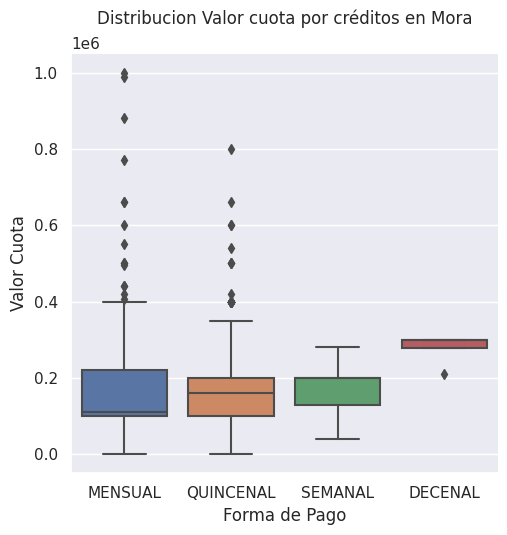

In [995]:
# Distribucion Valor cuota de creditos en mora por forma de pago
sns.catplot(data=df_prestamo[df_prestamo['mora']==1], x='forma_pago', y='valor_cuota', kind='box')
plt.title('Distribucion Valor cuota por créditos en Mora\n')
plt.xlabel('Forma de Pago')
plt.ylabel('Valor Cuota')
plt.show();

Aqui queremos mirar mas detalladamente la distribucion del valor de las cuotas de los créditos que estan en mora.

Se ve mas claramente como esta por encima el tipo de pago decenal aunque tiene un cantidad de créditos muy puqueño.

Nota: Creamos una agrupacion abajo para poder ver con mas precision los promedios de cuota y la cantidad que hay por forma de pago.

In [996]:
df_prestamo.groupby((['forma_pago','mora']))[['valor_cuota']].agg(['count','mean'])

valor_cuota               
                      count           mean
forma_pago mora                           
DECENAL    0             99  174898.989899
           1              4  277500.000000
MENSUAL    0          64383  119594.665440
           1            783  153405.650064
QUINCENAL  0          14790  138403.322110
           1            631  163514.565769
SEMANAL    0            295  171758.264407
           1             10  170000.000000

In [997]:
df_prestamo[df_prestamo['mora']==1].groupby(('forma_pago'))[['valor_cuota']].agg(['count','mean'])

valor_cuota               
                 count           mean
forma_pago                           
DECENAL              4  277500.000000
MENSUAL            783  153405.650064
QUINCENAL          631  163514.565769
SEMANAL             10  170000.000000

In [998]:
df_prestamo[df_prestamo['mora']==0].groupby(('forma_pago'))[['valor_cuota']].agg(['count','mean'])

valor_cuota               
                 count           mean
forma_pago                           
DECENAL             99  174898.989899
MENSUAL          64383  119594.665440
QUINCENAL        14790  138403.322110
SEMANAL            295  171758.264407

Las anteriores agrupaciones se realizaron para ver con mas detalle y con valores exactos. Pero siguen siendo los mismo datso que se intentaron ver en las graficas anteriores.

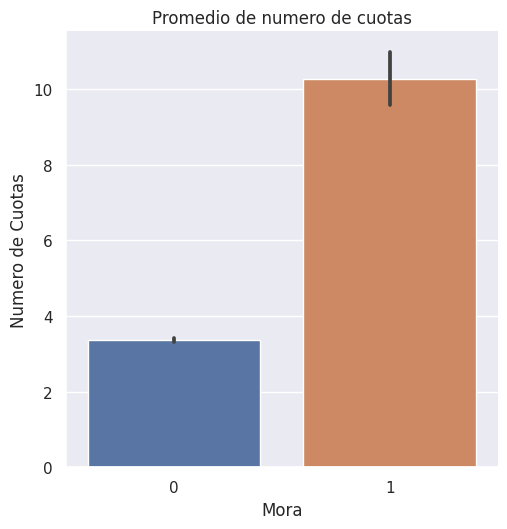

In [999]:
#Promedio Numero de cuotas por creditos en mora
sns.catplot(data=df_prestamo, x='mora', y='num_cuotas', kind='bar')
plt.title('Promedio de numero de cuotas')
plt.xlabel('Mora')
plt.ylabel('Numero de Cuotas')
plt.show();


En esta grafica vemos claramente como los creditos que estan en mora tienen un promedio de numero de cuotas mas altas.
Nota: Iremos mirando mas detalladamente este comportamiento ya que a traves de esta variable podriamos llegar a encontrar una segmentacion importante con la variable objetivo.

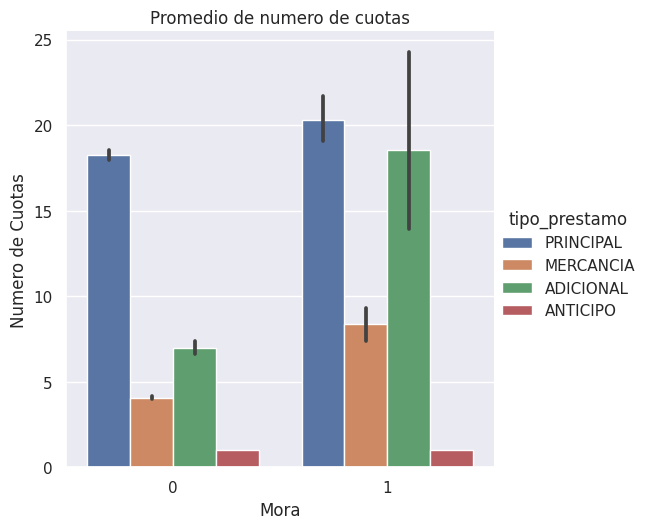

In [1000]:
sns.catplot(data=df_prestamo, x='mora', y='num_cuotas',hue='tipo_prestamo', kind='bar')
plt.title('Promedio de numero de cuotas')
plt.xlabel('Mora')
plt.ylabel('Numero de Cuotas')
plt.show();

En esta grafica simplemente dividimos los créditos que estan y los que no estan en mora por forma de pago a ver si encontrabamos un patron que los pudiera diferenciar. Podemos er que el numero promedio de cuotas cambia notablemente en el tipo de prestamo adicional teniendo en cuenta que en los creditos en mora su desviacion estandar es mas alta.

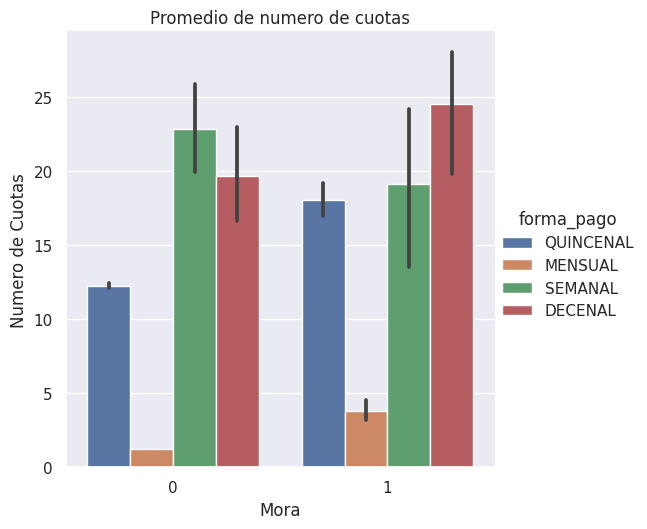

In [1001]:
sns.catplot(data=df_prestamo, x='mora', y='num_cuotas',hue='forma_pago', kind='bar')
plt.title('Promedio de numero de cuotas')
plt.xlabel('Mora')
plt.ylabel('Numero de Cuotas')
plt.show();

En esta grafica podemos ver como el numero de cuotas se comporta de manera muy similar tanto para los creditos en mora y los que no. Teniendo en cuenta que se intercambian semanal y decenal.

In [1002]:
num_c=df_prestamo['num_cuotas'].isin([1,0])
m_1 = df_prestamo['mora'].isin([1])
df_prestamo[num_c & m_1].groupby((['tipo_prestamo','num_cuotas']))[['num_prestamo']].agg(['count','mean'])

num_prestamo              
                                count          mean
tipo_prestamo num_cuotas                           
ADICIONAL     0                     4  34620.500000
              1                     4  21217.500000
ANTICIPO      1                   589  60177.551783
MERCANCIA     0                     3  81431.000000
              1                    25  72399.440000
PRINCIPAL     0                     3  57311.666667
              1                     2  17736.500000

In [1003]:
num_c=df_prestamo['num_cuotas'].isin([1,0])
m_1 = df_prestamo['mora'].isin([0])
df_prestamo[num_c & m_1].groupby((['tipo_prestamo','num_cuotas']))[['num_prestamo']].agg(['count','mean'])

num_prestamo              
                                count          mean
tipo_prestamo num_cuotas                           
ADICIONAL     0                    20  32446.250000
              1                   505  20898.168317
ANTICIPO      0                     6  32285.833333
              1                 58878  43372.341724
MERCANCIA     0                    22  54571.681818
              1                  3621  46822.606738
PRINCIPAL     0                    16  38233.750000
              1                    40  34046.125000

#Nota: Preguntar al experto de negocio porque existen créditos con numero de cuotas en 0

In [1004]:
df_prestamo.num_cuotas.isin([0]).sum()

74

Cantidad de créditos con numero de cuotas en 0.

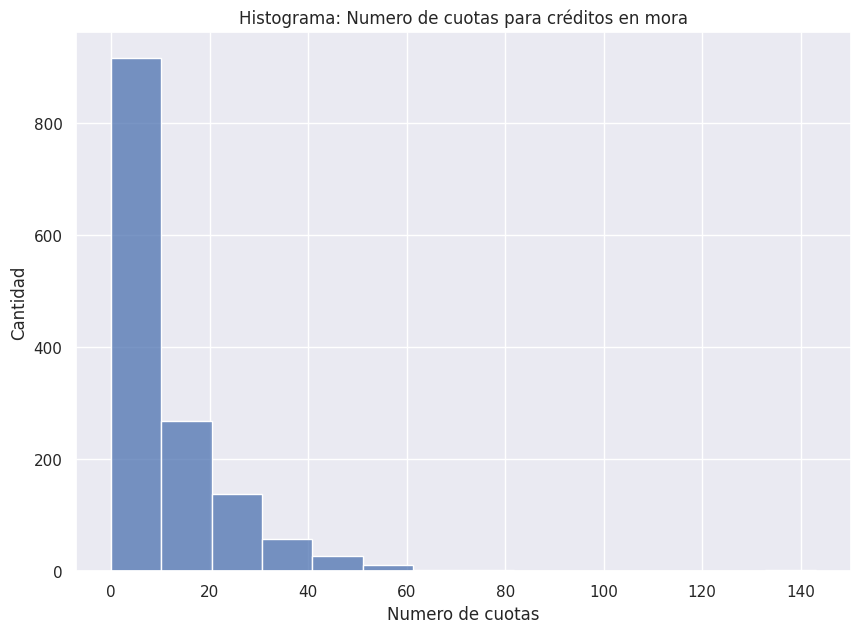

In [1005]:
plt.subplots(figsize = (10,7))
sns.histplot(df_prestamo[df_prestamo['mora']==1],x='num_cuotas',bins=14)
plt.title('Histograma: Numero de cuotas para créditos en mora')
plt.xlabel('Numero de cuotas')
plt.ylabel('Cantidad')
plt.show();

Para los creditos en mora vemos como existe una alta frecuencia entre 0 y 10 cuotas.

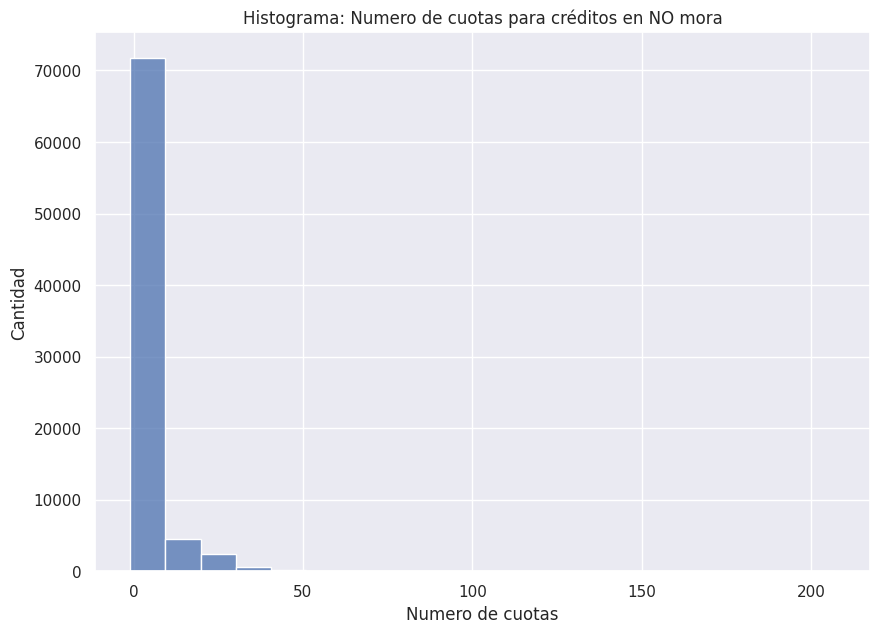

In [1006]:
plt.subplots(figsize = (10,7))
sns.histplot(df_prestamo[df_prestamo['mora']==0],x='num_cuotas',bins=20)
plt.title('Histograma: Numero de cuotas para créditos en NO mora')
plt.xlabel('Numero de cuotas')
plt.ylabel('Cantidad')
plt.show();

Al igual que en la grafica anterior vemos como casi todos los creditos que no estan en mora entan entre 0 y 10 coutas.

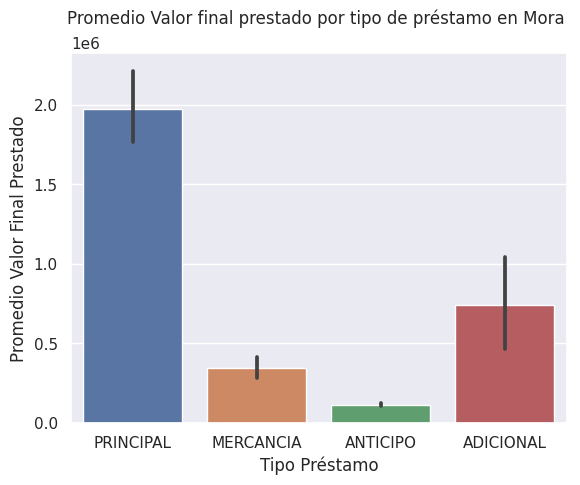

In [1007]:
sns.barplot(data=df_prestamo[df_prestamo['mora']==1], y='valorfinalprestamo', x='tipo_prestamo')
plt.title('Promedio Valor final prestado por tipo de préstamo en Mora \n')
plt.xlabel('Tipo Préstamo')
plt.ylabel('Promedio Valor Final Prestado')
plt.show();

Vemos como el tipo de crédito principal tiene un promedio de valor final prestado mas alto que el resto de los tipos.

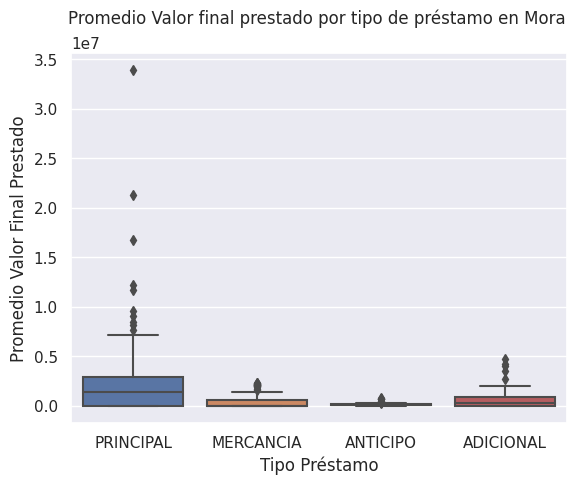

In [1008]:
sns.boxplot(data=df_prestamo[df_prestamo['mora']==1], y='valorfinalprestamo', x='tipo_prestamo')
plt.title('Promedio Valor final prestado por tipo de préstamo en Mora \n')
plt.xlabel('Tipo Préstamo')
plt.ylabel('Promedio Valor Final Prestado')
plt.show();

Distribucion de valor final de préstamo por tipo de crédito

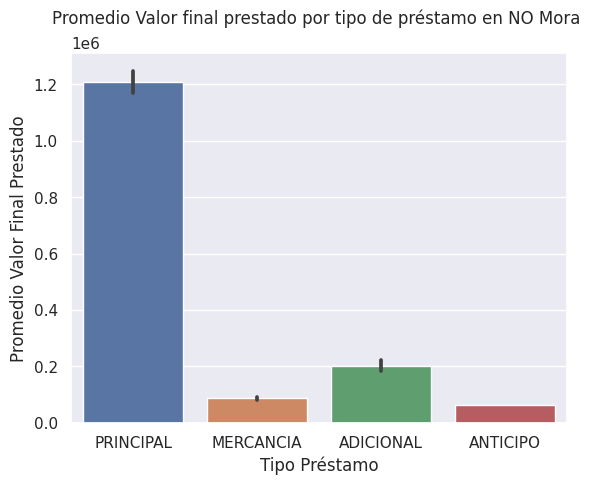

In [1009]:
sns.barplot(data=df_prestamo[df_prestamo['mora']==0], y='valorfinalprestamo', x='tipo_prestamo')
plt.title('Promedio Valor final prestado por tipo de préstamo en NO Mora \n')
plt.xlabel('Tipo Préstamo')
plt.ylabel('Promedio Valor Final Prestado')
plt.show();

De igual manera que en los créditos en mora el tipo principal tiene el promedio mas alto.

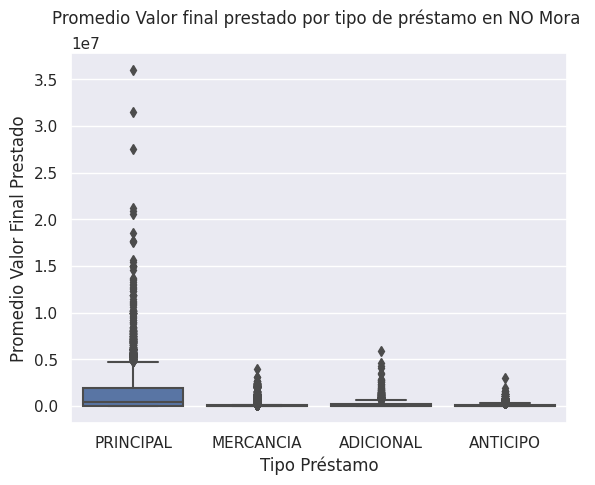

In [1010]:
sns.boxplot(data=df_prestamo[df_prestamo['mora']==0], y='valorfinalprestamo', x='tipo_prestamo')
plt.title('Promedio Valor final prestado por tipo de préstamo en NO Mora \n')
plt.xlabel('Tipo Préstamo')
plt.ylabel('Promedio Valor Final Prestado')
plt.show();

Distribucion de valor final de préstamo por tipo de crédito.

In [1011]:
df_prestamo[df_prestamo['mora']==1].groupby(('tipo_prestamo'))[['valorfinalprestamo']].agg(['count','mean'])

valorfinalprestamo              
                           count          mean
tipo_prestamo                                 
ADICIONAL                     54  7.396665e+05
ANTICIPO                     593  1.142273e+05
MERCANCIA                    234  3.461114e+05
PRINCIPAL                    547  1.971940e+06

In [1012]:
df_prestamo[df_prestamo['mora']==0].groupby(('tipo_prestamo'))[['valorfinalprestamo']].agg(['count','mean'])

valorfinalprestamo              
                           count          mean
tipo_prestamo                                 
ADICIONAL                   1783  2.017422e+05
ANTICIPO                   59422  6.348223e+04
MERCANCIA                   9837  8.639284e+04
PRINCIPAL                   8525  1.208740e+06

No se analizo muy a fondo esta variable debido a que el experto de negocio no sabe para que se usa esta variable en el sofware de la empresa. Por tanto no la tomaremos encuenta para ingresarla en el modelo de prediccion.

In [1013]:

v_0=df_prestamo['valorfinalprestamo'].isin([0])
df_prestamo[v_0].groupby((['mora','tipo_prestamo']))[['valor_prestamo']].count()

valor_prestamo
mora tipo_prestamo                
0    ADICIONAL                1060
     ANTICIPO                25147
     MERCANCIA                4301
     PRINCIPAL                4116
1    ADICIONAL                  23
     ANTICIPO                   96
     MERCANCIA                  57
     PRINCIPAL                 155



---

---





#**MODELO DE MACHINE LEARNING**

# **Eleccion del modelo Benchmark**

he decidido usar un modelo como es el **Arbol de decisón** debido a que este me da un alto poder explicativo y puedo llegar a centrarme en las comparaciones que este crea, es decir las bifurcaciones.

Luego de mejorar el benchmark correre otros modelos y analizare cual me funciona mejor.

In [1014]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix

In [1015]:
df_prestamo.columns

Index(['num_prestamo', 'valor_prestamo', 'valor_entregado', 'intereses',
       'valor_cuota', 'num_cuotas', 'cuotas_pen', 'tipo_interes', 'forma_pago',
       'tipo_prestamo', 'estado_prestamo', 'fecha_prestamo', 'cod_cliente',
       'valorfinalprestamo', 'dias_mora', 'saldo_prestamo', 'mora'],
      dtype='object')

Inicialmente entrenaremos un Arbol de Decision ya que este puede trabajar con variables categoricas sin ningun problema. Despues de ello crearemos algunas dummies para las variables categoricas y luego elegir un bechmark.

In [1016]:
X = df_prestamo.drop(columns=['num_prestamo','cuotas_pen','fecha_prestamo','cod_cliente','dias_mora','saldo_prestamo','mora'])
y = df_prestamo['mora']

In [1017]:
X.columns

Index(['valor_prestamo', 'valor_entregado', 'intereses', 'valor_cuota',
       'num_cuotas', 'tipo_interes', 'forma_pago', 'tipo_prestamo',
       'estado_prestamo', 'valorfinalprestamo'],
      dtype='object')

In [1018]:
 X = pd.get_dummies(X,drop_first=True)

Con la funcion de pandas (get_dummies) se codifico las variables categoricas en numeros enteros ya que algunos modelos no permiten trabajar con variables categorias en string.

In [1019]:
X

valor_prestamo  ...  estado_prestamo_CANCELADO
0            230000.0  ...                          1
1            440000.0  ...                          0
2           1000000.0  ...                          1
3            200000.0  ...                          1
4            313794.0  ...                          1
...               ...  ...                        ...
80990        430000.0  ...                          0
80991         17000.0  ...                          0
80992        300000.0  ...                          0
80993        100000.0  ...                          0
80994         40000.0  ...                          0

[80995 rows x 14 columns]

Se decidio sacar del dataframe que sera introducido al modelo de machine learning (X) dichas variables ya que unas pertenecen a codigos internos para identificar el crédito y al cliente, otras porque no esta claro para que se usan y las variables 'dias_mora' y 'saldo_prestamo' porque presentan filtracion con respecto a la variable objetivo, debido a que dichas variables solo las presentan aquellos créditos que estan en mora, que es lo que intentamos predecir.

Aunque la variable 'valorfinalprestamo' no sabemos para que funciona o q significan los valores que alli guarda, la ingresaremos al modelo para probar si encuentra alguna relacion.

In [1020]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

dividimos el dataframe en los de entrenamiento y testeo con un porcentaje de 70% entrenamiento y 30% testeo

In [1021]:
from sklearn.tree import DecisionTreeClassifier

Se creara el arbol de decision y se entrenara.

In [1022]:
tree_classifier = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Luego de entrenar el arbol, predecire con los datos de entrenamiento y de testeo para luego mirar la precision del modelo y la matriz de confusion para ambos grupos de datos.

In [1023]:
y_train_pred = tree_classifier.predict(X_train)
y_test_pred = tree_classifier.predict(X_test)

#**METRICAS**

In [1024]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

Como hemos visto en el EDA, sabemos que nuestra variable a predecir son CLASES mas no datos numericos continuos. Las metricas y herramientas que usaremos seran: Matriz de confucion, Accuracy, Recall y F1-Score. Que son algunas de las metricas que se usan para los problemas de clasificacion.

Si nuestro problema  fuera de regresion usariamos matricas como: MSE, MAE, RMSE.


**Matriz de confusion**

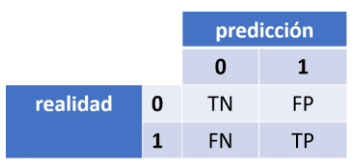

TN = True Negative

TP = True Positive

FP = False Positive

FN = False Negative

Para nuestro caso nos interesa Saber y aumentar la cantidad de TP que nuestro modelo puede identificar y llegar a predecir.

Para ello usaremos ciertas metricas diferentes al Accuracy que explicare acontinuacion.

**Accuracy**
- Train: 0.9861718639762946
- Test: 0.9863780402485699

Recordando que el accuracy viene dado por la formula:
 
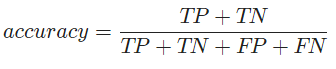





​	



Teniendo en cuenta que en nuestro sdatos tenemos unas clases muy desbalanceadas, esta metrica no sirve de mucho para medir nuestro modelo. Dado que siempre habra un gran porcentaje de clase 0 y uno pequeño de clase 1, lo que hace que la clase aporte un mayor porcentaje al calcular esta metrica y la clase que finalmente nos interesa predecir es la clase 1.

Por ello utilizaremos otras metricas como lo son Precision, Recall y F1-score.

**Precision**

Recordando lo visto en clases vemos que precision viene dada por la formula: 

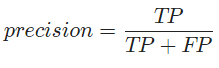

Con esta metrica medimos la calidad del modelo, es decir de todos los valores que predice de una clase el modelo, cuales son reales y en cuales se equivoco. Por tanto esta metrica nos va ayudar a saber cuantos de la clase (que es la que nos interesa) son reales.

**Recall (Exhaustividad)**

Recordando lo visto en clases vemos que Recall viene dada por la formula: 

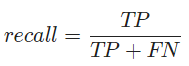

Con esta metrica podemos identificar que cantidad de los datos reales nuestro modelo fue capaz de encontrar. Por ello al tener clases tan desbalanceadas tambien la tendremos encuenta.

**F1-Score**

Recordando lo visto en clases F1 viene dado por la formula:

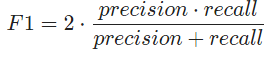

Esta metrica nos ayuda a combinar las dos anteriores, asumiendo que nos importa de igual manera ambas. por tanto tambien es interesante mirar como se comporta dicha metrica en nuestro modelo.

Precision y matriz de confusion para los datos de entrenamiento.

Exactitud:  0.9861718639762946


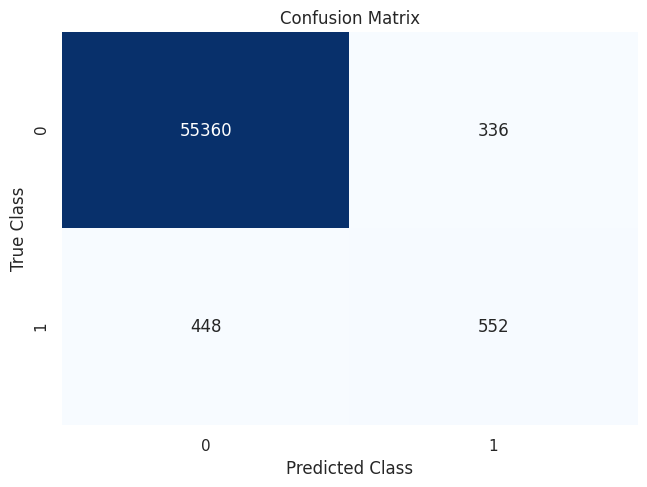

In [1025]:
#Precision para los datos de entrenamiento
print("Exactitud: ",accuracy_score(y_train,y_train_pred))
# crear mapa de calor dibujar la matriz de confusion
sns.heatmap(pd.DataFrame(confusion_matrix(y_train,y_train_pred)), annot=True, fmt='.0f' , cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

Precision y matriz de confusion para los datos de testeo.

Exactitud:  0.9863780402485699


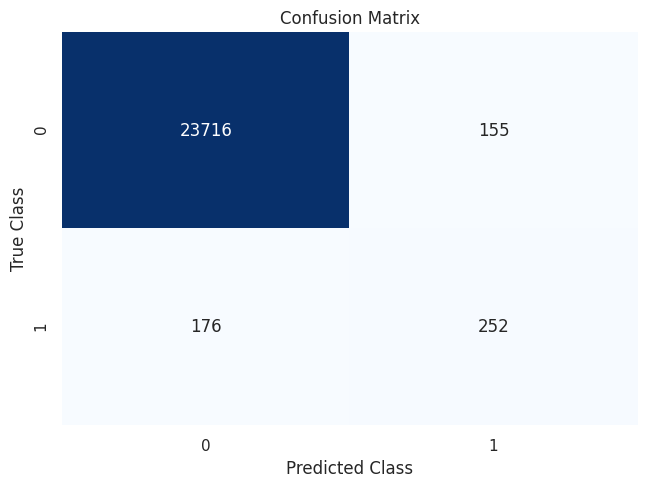

In [1026]:
print("Exactitud: ",accuracy_score(y_test,y_test_pred))
# crear mapa de calor dibujar mapa de calor
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_test_pred)), annot=True,  fmt='.0f',cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

En ambos grupos de datos podemos ver como la exactitud es muy alta, pero al fijarnos en la matriz de confusion encontramos que para clase 1 no es muy buena al tratar de predecir, esto es debido a que la variable objetivo esta muy desbalanceada apoximadamente 74.000 de clase 0 contra aproximadamente 1.500 de clase 1.

Debido a lo anterior miraremos otro tipo de metricas las cuales nos pueden ayudar mas para este caso, como lo son recall y f1-score.


#Reportes de Metricas

Con ayuda de la funcion classification_report de Sklearn podemos observar las metricas que nos pueden ayudar a medir nuestro modelo.


In [1027]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     55696
           1       0.62      0.55      0.58      1000

    accuracy                           0.99     56696
   macro avg       0.81      0.77      0.79     56696
weighted avg       0.99      0.99      0.99     56696



Metricas para datos de testeo

In [1028]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     23871
           1       0.62      0.59      0.60       428

    accuracy                           0.99     24299
   macro avg       0.81      0.79      0.80     24299
weighted avg       0.99      0.99      0.99     24299



# **Conclusiones Metricas**

***Precision***

vemos como la precision para la clase 0 es muy alta (0.99) en ambos grupos de datos pero para la clase 1 (que es la que nos interesa) no es muy buena (0.62). 

Lo cual quiere decir que solo el 62% de lo predicho para la clase 1 (la que nos interesa) son verdaderos. Y este comportamiento lo tenemos tanto para los datos de Train y de Test.








***Recall***

En entramiento obtuvimos:
*   Clase 0: 0.99
*   Clase 1: 0.55

En Testing obtuvimos:
*   Clase 0: 0.99
*   Clase 1: 0.59

Esto nos quiere decir que nuestro modelo puede identificar entre 55% para train y 59% para test de los datos que son reales.






Cn esto podemos ver como nuestro modelo no es tan bueno para predecir la clase 1 que finalmente es la que nos interesa, en comparacion con la clase 0.

Por tanto analizaremos que mas variables podemos introducir o crear al dataframe que convertirmos en 'X' y luego de hacer ello correremos nuevamente el modelo para ver de que forma mejoran los datos. 

Nota: una forma de intentar mejorar el modelo seria agregando pesos a las clases de la variable objetivo, que seria el total de muestras de clase 0 dividio el total de muestras clase 1.Pero esta opcion la dejaremos por ultimo, ya que al mejorar en una clases se deberia empeorar en otra (*no free  lunch*).

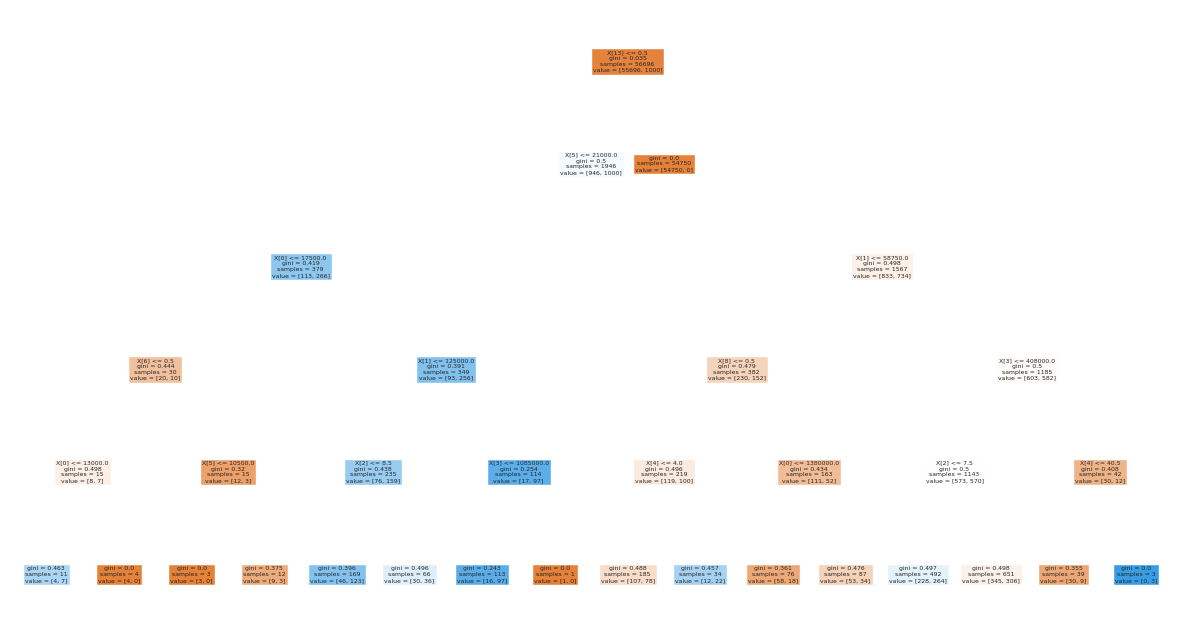

In [1029]:
from sklearn import tree
if tree_classifier.max_depth < 15:
    plt.figure(figsize = (15,8))
    tree.plot_tree(tree_classifier, filled = True, fontsize=None)
    plt.show();

Graficamos las bifurcaciones que creo el arbol de decision pero no vamos a analizar esats mas a delante debido a que no fue muy preciso el arbol a la hora de predecir las etiquetas de la clase que nos interesa.



---

---





#Creacion de nuevas variables para el dataframe df_prestamos

Al hablar con el experto de negocio e indagar mas sobre el proceso de aprobacion y toma de decisiones, sobre los creditos que da la empresa. Me doy cuenta que hay otras variables que se deben tener encuenta pero que estos procesos son muy empiricos o a lo que el encargado recuerde.

Tales variables son:
*   Sueldo del cliente.
*   antiguedad
*   Cantidad de creditos que tiene activo
*   Comportamiento de pagos

Por ello, iremos intentando crear e introducir dichas variables al dataframe. 

#**Nuevas Variables**





#1. Sueldo Cliente





Para ello nos remetiremos de nuevo a la base de datos de la empresa donde en la tabla clientes guardan dicha informacion.

Nota: con jupyter notebook de formal local, me conecte a la base de datos y exporte los datos de dicha tabla. 

In [1030]:
# df_clientes sera como llamare el dataframe donde guardare la informacion de la tabla clientes
df_clientes = pd.read_csv('/content/drive/MyDrive/Data Science Acamica/Sprint 1/Proyecto/cliente_ex.csv', sep=';', index_col = 0)
df_clientes.head(10)

cod_cliente     cargo fecha_ingreso  ...      cedula cod_empresa  codigoemp
0         1000  OPERADOR    2014-12-29  ...     8773201         408       1010
1         1001         A    2014-12-29  ...    72334821          11       2222
2         1002  OPERADOR    2014-12-29  ...     8565384          11       1010
3         1003         A    2014-12-29  ...    72152644          11       2222
4         1004  OPERADOR    2014-12-29  ...  1042348067          11       1010
5         1005  OPERADOR    2014-12-29  ...    72053193          11       1010
6         1006  OPERADOR    2014-12-29  ...     8573725          11       1010
7         1007         0    2014-12-29  ...    72339923          11       2222
8         1008  OPERADOR    2014-12-29  ...    72000219         109       2222
9         1009  DESPACHO    2014-12-29  ...    72431390          21       1010

[10 rows x 11 columns]

Inicialmente eliminaremos datos que no necesitamos y id

In [1031]:
df_clientes.drop(columns=['forma_pago','v_prestamo','recomendado','cedula','cod_empresa','codigoemp'], inplace=True)
df_clientes.shape

(1808, 5)

In [1032]:
df_clientes.isnull().sum()

cod_cliente      0
cargo            6
fecha_ingreso    0
estado           0
sueldo_basico    0
dtype: int64

Cantidad de valores nulos por colunna.

Vamos a ir analizando cada columna.


In [1033]:
df_clientes.dtypes

cod_cliente        int64
cargo             object
fecha_ingreso     object
estado            object
sueldo_basico    float64
dtype: object

Analizamos para que nos puede llegar a servir cada columna.

*   cod_cliente: nos servira para usarlo como llave para unir este dataframe con el dataframe prestamos (df_prestamo)
*   cargo: Nos puede ayudar al para asociarlo con el sueldo que tiene el empleado
*   fecha_ingreso: Nos servira para mirar desde que año el cliente viene realizando créditos y asi mirar la antiguedad que tenia con respecto a la fecha en que solicita el credito.
*   estado: aun no identifico para que serviria, pero almacena si un cliente esta activo o no en el sistema.
*   sueldo_basico: salario que devenga el cliente.







hablando con el experto de negocio, me hace saber que la informacion en la columna 'estado' no es muy confiable ya que casi nunca se modifica esta informacion del cliente y aunque le cambien dicho valor a 'NO ACTIVO' el sistema permite seguir asignando creditos al cliente. Por ello aliminaremos del dataframe dicha columna.

In [1034]:
df_clientes.drop(columns=['estado'], inplace=True)
df_clientes.shape

(1808, 4)

In [1035]:
#columna cargo
df_clientes.cargo.value_counts()

OPERARIO                        477
0                               122
NO TIENE                         77
VIGILANTE                        61
OPERADOR                         54
                               ... 
LIDER DE OPERACION                1
AUXILIAR SERVICIO AL CLIENTE      1
AUX ADMINITRATIVO                 1
FISIOTERAPEUTA                    1
OP. REVISION                      1
Name: cargo, Length: 509, dtype: int64

Aunque esta variable podria asociarse con el salario que devenga un cliente, la informacion que ahora mismo esta consignada en el sistema de la empresa no esta estandarizada por lo que encontramos una gran cantidad de posibles valores para esta variable. Por ellos no es posible asociar esta variable con el sueldo basico del cliente.

Por otro lado de encontraron valores para esta variable salidos de contexto, por ejemplo: 'Sapo', 'Sapito', 'Sapovisor', etc. Lo cual fue comunicado al experto de negocio.

In [1036]:
df_clientes.drop(columns=['cargo'], inplace=True)

In [1037]:
df_clientes.shape

(1808, 3)

Columna sueldo_basico

In [1038]:
df_clientes.sueldo_basico.value_counts()

0.0          380
1000000.0    117
1200000.0     95
800000.0      92
900000.0      78
            ... 
849000.0       1
1485000.0      1
646000.0       1
1317000.0      1
683000.0       1
Name: sueldo_basico, Length: 298, dtype: int64

Podemos ver como hay una gran cantidad de sueldos inscritos en el sistema y el valor que mas cantidad presenta es 0. Y hablando con el experto de negocio dice que la mayoria de los clientes que estan en 0 es porque ganan el minimo.
Por ello crearemos una nueva columna con categorias para dichos salarios (bajo, medio y alto) que seran creados a apartir del salario minimo legal vigente que tenemos en Colombia.

Nota: Este proceso se realizara más adelante al unir el dataframe clientes con el dataframe préstamos.

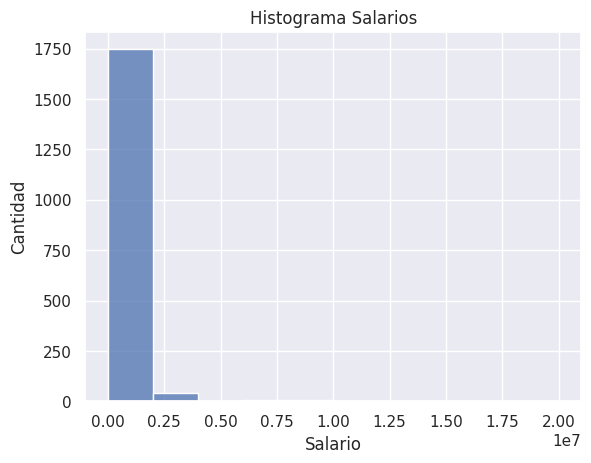

In [1039]:
sns.histplot(data=df_clientes, x='sueldo_basico', bins=10)
plt.title('Histograma Salarios')
plt.xlabel('Salario')
plt.ylabel('Cantidad')
plt.show();


AL ver dicho histograma podemos ver como el rango salarial se encuentra muy contrado en valors pequeños aproximadamente entre 0 y 200 mil pesos.

# Variable fecha_ingreso

Dicha variable aunque es una fecha pandas no le asigno este tipo de dato, por tanto convertiremos dicha variable de tipo object a datetime.

In [1040]:
df_clientes['fecha_ingreso'] = pd.to_datetime(df_clientes['fecha_ingreso'],yearfirst=True)

In [1041]:
df_clientes.dtypes

cod_cliente               int64
fecha_ingreso    datetime64[ns]
sueldo_basico           float64
dtype: object

Ya teniendo estos datos listos, procedemos a unir dicho dataframe con el dataframe prestamos (df_prestamos) por la columna 'cod_cliente'.

In [1042]:
#verificamos el shape de df_prestamo antes de unir
df_prestamo.shape

(80995, 17)

In [1043]:
df_prestamo = pd.merge(df_prestamo, df_clientes,how='left',on='cod_cliente')
df_prestamo.shape

(80995, 19)

In [1044]:
df_prestamo.head()

num_prestamo  valor_prestamo  ...  fecha_ingreso  sueldo_basico
0          1340        230000.0  ...     2014-12-29       616000.0
1          1341        440000.0  ...     2014-12-23       616000.0
2          1342       1000000.0  ...     2014-12-02       900000.0
3          1343        200000.0  ...     2014-12-13       616000.0
4          1344        313794.0  ...     2015-01-05       700000.0

[5 rows x 19 columns]

In [1045]:
df_prestamo.isnull().sum()

num_prestamo          0
valor_prestamo        0
valor_entregado       0
intereses             0
valor_cuota           0
num_cuotas            0
cuotas_pen            0
tipo_interes          0
forma_pago            0
tipo_prestamo         0
estado_prestamo       0
fecha_prestamo        0
cod_cliente           0
valorfinalprestamo    0
dias_mora             0
saldo_prestamo        0
mora                  0
fecha_ingreso         0
sueldo_basico         0
dtype: int64

## Creando categorias de salarios:

salario minimo legal vigente 2021: $ 877.804


In [1046]:
#variable donde guardare el salario minimo
sal_minimo = 877804

In [1047]:
#asignar un rango de salarion al cliente en funcion del salario minimo para 2021 y etiquetarlos segun ese rango
df_prestamo['rango_salario']= pd.cut(df_prestamo['sueldo_basico'],
                                     [0,sal_minimo,sal_minimo*2,df_prestamo.sueldo_basico.max()],
                                     labels=['BAJO','MEDIO','ALTO'],include_lowest=True)


Con la funcion 'cut' de pandas cree unos bins, donde les asigne unos rangos y a cada rango unas etiquetas por las cuales se identificara cada bin.

Nota: se asignaron estos rangos porque es así como los diferencian en la empresa.

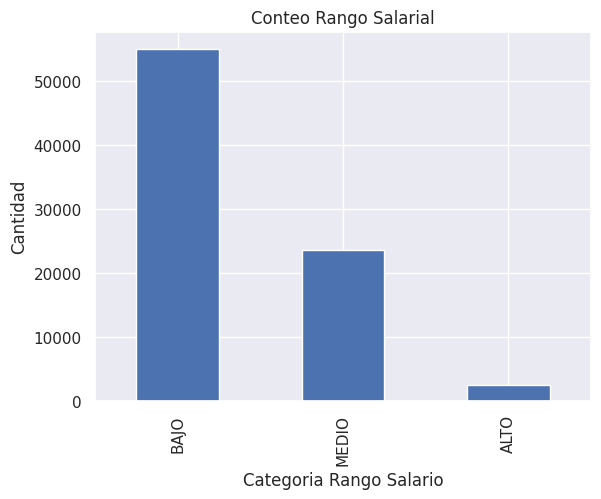

In [1048]:
#Cantidad de registros por rango de salario
df_prestamo.rango_salario.value_counts().plot(kind='bar')
plt.title('Conteo Rango Salarial')
plt.xlabel('Categoria Rango Salario')
plt.ylabel('Cantidad')
plt.show();

En la grafica podemos ver como la categoria 'BAJO'  posee un porcentaje muy grande de los datos apra esta variable.

In [1049]:
df_prestamo.isnull().sum()

num_prestamo          0
valor_prestamo        0
valor_entregado       0
intereses             0
valor_cuota           0
num_cuotas            0
cuotas_pen            0
tipo_interes          0
forma_pago            0
tipo_prestamo         0
estado_prestamo       0
fecha_prestamo        0
cod_cliente           0
valorfinalprestamo    0
dias_mora             0
saldo_prestamo        0
mora                  0
fecha_ingreso         0
sueldo_basico         0
rango_salario         0
dtype: int64

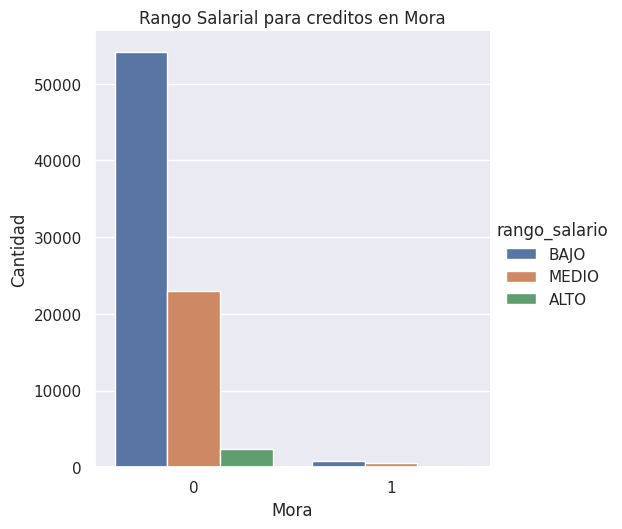

In [1050]:
sns.catplot(data=df_prestamo, x='mora', hue='rango_salario', kind='count')
plt.title('Rango Salarial para creditos en Mora')
plt.xlabel('Mora')
plt.ylabel('Cantidad')
plt.show();

In [1051]:
df_prestamo.groupby((['mora','rango_salario']))[['num_prestamo']].count( )

num_prestamo
mora rango_salario              
0    BAJO                  54107
     MEDIO                 23027
     ALTO                   2433
1    BAJO                    835
     MEDIO                   542
     ALTO                     51

Debido a que la grafica no eja ver claramente si hay valores para algunas categorias al ser muy bajo este valor, cree esta agropacion que nos permite ver claramente la cantidad que pertenece a cada categoria.




---



---



Al unir estos dataframe ya incorporamos una de las nuevas varibales, que es salario y otra que es el rango.

Ahora vamos crear la variable antiguedad.

Esta variable antiguedad la crearemos apartir de la resta de las fechas de ingreso del cliente al sistema con la fecha en que se realizo el credito, pero solo tendremos encuenta los años que tiene el cliente.

NOta: Solo se tienen en cuenta los años, debido a que el encargado de aprobar los credito se formula la pregunta '¿Cuantos años tiene este cliente de trabajar con nosotros?', al momento de tomar la decision de aprobar o no un credito. Y el experto de negocio nos dice que normalmente se toman en cuenta los años.

In [1052]:
#creamos una nueva columna para guardar los años de antiguedad que tiene el cliente
df_prestamo['antiguedad'] =  pd.DatetimeIndex(df_prestamo['fecha_prestamo']).year - pd.DatetimeIndex(df_prestamo['fecha_ingreso']).year
df_prestamo.head()

num_prestamo  valor_prestamo  ...  rango_salario  antiguedad
0          1340        230000.0  ...           BAJO           0
1          1341        440000.0  ...           BAJO           0
2          1342       1000000.0  ...          MEDIO           0
3          1343        200000.0  ...           BAJO           0
4          1344        313794.0  ...           BAJO           0

[5 rows x 21 columns]

In [1053]:
#verificamos los datos por orden
df_prestamo.antiguedad.value_counts()

 1     24497
 2     16629
 3     11377
 0     11308
 4      8138
 5      5725
 6      2817
 7       421
-1        79
-2         2
-12        1
 8         1
Name: antiguedad, dtype: int64

Vemos como hay algunos valores negativos, esto se debe a que los creditos tienen una fecha menor a la fecha en la que fue creado el cliente. Esto se presenta ya que el sistema asigna automaticamente la fecha en que el cliente es creado, en cambio la fecha del credito es asignada por el usuario del sistema de la empresa.

In [1054]:
df_prestamo[df_prestamo['antiguedad']<0][['fecha_prestamo','fecha_ingreso']]

fecha_prestamo fecha_ingreso
86    2014-12-30 13:12:16    2015-01-05
87    2014-12-24 13:12:16    2015-01-05
89    2014-11-04 13:12:16    2015-01-05
93    2014-12-30 13:25:48    2015-01-06
94    2014-02-01 13:25:48    2015-01-06
...                   ...           ...
46580 2013-08-23 12:57:58    2015-01-06
71579 2018-12-21 14:26:58    2019-10-12
71619 2018-08-22 15:58:35    2019-10-12
74165 2019-12-31 12:34:13    2020-01-11
76922 2002-01-01 00:41:53    2014-08-01

[82 rows x 2 columns]

A simple vista podemos corroborar lo dicho anteriormente. Para resolver dicho problema crearemos una funcion para convertir estos numeros negativos en positivos.


In [1055]:
#funcion para convertir los valores de antiguedad negativos a positivos 
def convertir_pos(antiguedad):
  if antiguedad<0:
    return antiguedad * (-1)

  else:
    return antiguedad

In [1056]:
df_prestamo['antiguedad'] = df_prestamo['antiguedad'].apply(convertir_pos)

A la columna antiguedad le aplicamos la funcion anteriormente creada con la funcion apply.

In [1057]:
#Verificamos con datos
df_prestamo.antiguedad.value_counts()

1     24576
2     16631
3     11377
0     11308
4      8138
5      5725
6      2817
7       421
12        1
8         1
Name: antiguedad, dtype: int64

**Nota:** Esta variable antiguedad se mide en años

Al haber creado la variable antiguedad ya podemos eliminar la variable fecha de ingreso del dataframe.

In [1058]:
df_prestamo.shape

(80995, 21)

In [1059]:
df_prestamo.drop(columns='fecha_ingreso', inplace=True)
df_prestamo.shape

(80995, 20)

Ahora crearemos dos nuevas variables las cuales nos diran cuantos creditos ha realizado anteriormente y cuales estan en estado cancelados y cuales estan activos.

In [1060]:
#funcion para contar la cantidad de creditos cancelados antes de la fecha del credito para cada cliente
def creditos_cancelados(num):  
  #creamos una mascara y filtramos el dataframe por cliente
  cred_cliente =df_prestamo.loc[df_prestamo.cod_cliente.isin([num.cod_cliente])]
  #el mismo dataframe volvemos a filtrarlo para q seleccione solo los creditos que fueron realizados antes de la fecha del credito  
  cred_cliente =cred_cliente.loc[cred_cliente.fecha_prestamo < num.fecha_prestamo] 
  #por ultimo solo escogemos los creditos cancelados 
  cant = cred_cliente.estado_prestamo.isin(['CANCELADO']).sum()
  #retornamos la cantidad de dichos creditos
  return cant

In [1061]:
#creamos una nueva columna con la informacion que retorna la funcion creditos_cancelados
df_prestamo["cred_cancelados"]= df_prestamo.apply(creditos_cancelados,axis=1)

In [1062]:
df_prestamo.isnull().sum()

num_prestamo          0
valor_prestamo        0
valor_entregado       0
intereses             0
valor_cuota           0
num_cuotas            0
cuotas_pen            0
tipo_interes          0
forma_pago            0
tipo_prestamo         0
estado_prestamo       0
fecha_prestamo        0
cod_cliente           0
valorfinalprestamo    0
dias_mora             0
saldo_prestamo        0
mora                  0
sueldo_basico         0
rango_salario         0
antiguedad            0
cred_cancelados       0
dtype: int64

Ahora crearemos una funcion para contar la cantidad de creditos que tiene activos.

In [1063]:
df_prestamo

num_prestamo  valor_prestamo  ...  antiguedad  cred_cancelados
0              1340        230000.0  ...           0                0
1              1341        440000.0  ...           0                0
2              1342       1000000.0  ...           0                0
3              1343        200000.0  ...           0                0
4              1344        313794.0  ...           0                0
...             ...             ...  ...         ...              ...
80990         84874        430000.0  ...           4               68
80991         84875         17000.0  ...           5               83
80992         84876        300000.0  ...           3              100
80993         84878        100000.0  ...           7              237
80994         84879         40000.0  ...           6              302

[80995 rows x 21 columns]

In [1064]:
def creditos_activos(num):  
  #creamos una mascara y filtramos el dataframe por cliente
  cred_cliente =df_prestamo.loc[df_prestamo.cod_cliente.isin([num.cod_cliente])]  
  #el mismo dataframe volvemos a filtrarlo para q seleccione solo los creditos que fueron realizados antes de la fecha del credito  
  cred_cliente =cred_cliente[cred_cliente.fecha_prestamo < num.fecha_prestamo] 
  #por ultimo solo escogemos los creditos activos 
  cant = cred_cliente.estado_prestamo.isin(['ACTIVO']).sum()
  #retornamos la cantidad de dichos creditos  
  return cant

In [1065]:
df_prestamo["cred_activos"] = df_prestamo.apply(creditos_activos,axis=1)
df_prestamo

num_prestamo  valor_prestamo  ...  cred_cancelados  cred_activos
0              1340        230000.0  ...                0             0
1              1341        440000.0  ...                0             0
2              1342       1000000.0  ...                0             0
3              1343        200000.0  ...                0             0
4              1344        313794.0  ...                0             0
...             ...             ...  ...              ...           ...
80990         84874        430000.0  ...               68             2
80991         84875         17000.0  ...               83             2
80992         84876        300000.0  ...              100             3
80993         84878        100000.0  ...              237             5
80994         84879         40000.0  ...              302             3

[80995 rows x 22 columns]

Adicionalmente crearemos una nueva columna donde guardaremos la cantidad de dias promedio que el cliente ha estado en mora. Esto lo haremos calculando el numero total de dias que se demoro el cliente en pagar el prestamo y lo dividimos, segun la forma de pago que escogio, por los dias que contiene esa forma de pago y luego lo restamos con la los dias que contiene es forma de pago.

Nota: para forma de pago semanal contiene 7 dias, para decenal 10 dias, para quincenal 15 dias y para mensual 30 dias.

Para realizar el proceso anteriormente descrito, debo cargar la tabla pago de la base de datos.

In [1066]:
df_pagos = pd.read_csv('/content/drive/MyDrive/Data Science Acamica/Sprint 1/Proyecto/liquidacion_ex.csv', sep=';', index_col = 0)
df_pagos.head()

num_liquidacion  valor_deposito  ...  cod_cobrador  codigoemp
0              101        450000.0  ...          8888       2222
1              102        450000.0  ...          8888       2222
2              103        290000.0  ...          3365       8866
3              104        470000.0  ...          8888       8866
4              105        200000.0  ...          8888       8866

[5 rows x 13 columns]

In [1067]:
df_pagos.dtypes

num_liquidacion        int64
valor_deposito       float64
valor_cuota          float64
valor_intereses      float64
saldo_prestamo       float64
cuotas_c             float64
tipo_liquidacion      object
fecha_liquidacion     object
observacion           object
cod_cliente            int64
num_prestamo           int64
cod_cobrador           int64
codigoemp              int64
dtype: object

In [1068]:
df_pagos.isnull().sum()

num_liquidacion           0
valor_deposito            0
valor_cuota               0
valor_intereses           0
saldo_prestamo            0
cuotas_c               3387
tipo_liquidacion          0
fecha_liquidacion         0
observacion          223959
cod_cliente               0
num_prestamo              0
cod_cobrador              0
codigoemp                 0
dtype: int64

In [1069]:
df_pagos.shape

(244351, 13)

Eliminaremos las columnas que no usaremos.

In [1070]:
df_pagos.drop(columns=['valor_deposito','cuotas_c','tipo_liquidacion','observacion','cod_cliente','cod_cobrador','codigoemp'], inplace=True)

In [1071]:
df_pagos.shape

(244351, 6)

convertiremos la columna fecha_liquidacion de tipo object a datetime

In [1072]:
df_pagos['fecha_liquidacion'] =  pd.to_datetime(df_pagos['fecha_liquidacion'],yearfirst=True)

In [1073]:
#esta funcion solo se aplicaara a los creditos en estado CANCELADO
def dias_pagos(fila_cred):

  #seleccion los pagos realizados para cada creditos
  pagos = df_pagos.loc[df_pagos.num_prestamo.isin([fila_cred.num_prestamo])]

  #for indice, fila in pagos:

  if len(pagos)>0:

    #agregamos esta condicion para comprobar que no halla un error en los datos y la fecha de los pagos no sea mayor a la fecha del crédito
    fecha_minima = fila_cred.fecha_prestamo	
    fecha_maxima = pagos.fecha_liquidacion.max()

    #dias guarda la diferencia que hay entre las fechas
    dias = (fecha_maxima - fecha_minima).days    
    #dias_entre_cuotas guardara los dias que deben haber entre cuota
    #dias_entre_cuotas = 0
    #if fila_cred.forma_pago == 'SEMANAL':
    #  dias_entre_cuotas = 7
    #elif fila_cred.forma_pago == 'DECENAL':
    #  dias_entre_cuotas = 10
    #elif (fila_cred.forma_pago == 'QUINCENAL') | (fila_cred.forma_pago == 'MENSUAL' and fila_cred.tipo_prestamo == 'ANTICIPO'):
    #  dias_entre_cuotas = 15
    #else:
    #  dias_entre_cuotas = 30

    #ahora en la variable dias se guardara los dias en general que tuvo el credito en mora
    #dias = ((dias/dias_entre_cuotas) - len(pagos))*dias_entre_cuotas
    #ahora en dias se guarda la cantidad de dias en mora que tiene el credito

    # calculare el promedio de dias que hay entre las cuotas
    dias = ((dias) / len(pagos))

    return dias
    
  else:
    return 0

Con la nueva funcion creada, crearemos una nueva columna llamada dias_pago, donde si el valor es positivo es por que el cliente se demoro más dias en pagar de lo pactado y si su valor es negativo es porque el cliente pago antes de lo previsto.

In [1074]:
#df_prestamo['dias_pagos']= df_prestamo.apply(dias_pagos,axis=1)
df_prestamo

num_prestamo  valor_prestamo  ...  cred_cancelados  cred_activos
0              1340        230000.0  ...                0             0
1              1341        440000.0  ...                0             0
2              1342       1000000.0  ...                0             0
3              1343        200000.0  ...                0             0
4              1344        313794.0  ...                0             0
...             ...             ...  ...              ...           ...
80990         84874        430000.0  ...               68             2
80991         84875         17000.0  ...               83             2
80992         84876        300000.0  ...              100             3
80993         84878        100000.0  ...              237             5
80994         84879         40000.0  ...              302             3

[80995 rows x 22 columns]

In [1075]:
 #df_excel=df_prestamo[df_prestamo.dias_pagos<0]
 #file_name = 'creditos.xlsx'
 #df_excel.to_excel(file_name)

Se creo este archivo de excel con los datos de los creditos que reportan un alto numero numero negativo de dias de pagos, para enviarlo al experto de negocio y el pueda analizar como afecta esto el funcionamiento de la empresa y tomar opciones correctivas.

In [1076]:
#df_prestamo.dias_pagos.describe()

In [1077]:
#sns.histplot(data=df_prestamo ,x='dias_pagos',bins=10)

In [1078]:
#sns.catplot(data=df_prestamo, y = 'dias_pagos', kind='box')

In [1079]:
#sns.catplot(data=df_prestamo, x ='mora', y = 'dias_pagos', kind='box')

In [1080]:
#sns.catplot(data=df_prestamo, x='mora', y='dias_pagos', kind='bar')
#plt.title('Promedio de dias_pagos para los créditos en Mora')
#plt.xlabel('Mora')
#plt.ylabel('Dias Pagos')
#plt.show();

In [1081]:
#df_prestamo.loc[df_prestamo.dias_pagos.isin([-2633])]

In [1082]:
#df_pagos.loc[df_pagos.num_prestamo.isin([79456])]

Al realizar un analisis rapido de esta variable nueva, encontramos que la base de datos cuenta con algunas inconsistencias. Ya que posee para algunos creditos fechas que son mayor a la de los pagos que se realizan para dicho credito. Lo que equivaldria a decir que el cliente está pagando antes de realizar el credito.  

Para corregir dichos casos y con fines academicos decidí darle un valor de 0 para esos casos, pero dicha variable no sera incluida a la hora de cargar los datos al modelo de prediccion..

**Esta inconsistencia se le comunico al experto de negocio y este me informa que el software que usan en la empresa, carga la fecha y hora que tiene el PC en ese momento que guardan la información, pero que algunos PC's de la empresa tienen problemas y que cada que se apagan, al volver a encenderlos estos pierden la configuración de la fecha y hora. Y la persona que maneja el software no se percata de ello.**

**Nota:** al encontrar esta inconsistencia vemos como en la variable antiguedad tambien ha sido afectada en algunos casos ya que esta variable es calculada con la fecha del credito y la fecha que el cliente fue ingresado al software y como vimos algunas de estas fechas estan erradas, por tanto esta variable tambien ha sido afecatda.



---



---



Debido a las inconsistencias anteriormente encontradas, he decidido crear dos nueva variable con el numero de cuotas que ha pagado el cliente para cada credito y  otra que sera el resultado de la variable anterior menos la cantidad de cuotas que pacto pagar.

Si en la segunda variable encontramos valores negativos es debido a que el cliente pago en menos cuotas de las pactadas, si encontramos que es 0 es que el cliente pago en las cuotas pactadas y si es mayor que 0 es porque el cliente pago en mas cuotas de las que pacto.

Nota: Con esta nueva variable buscamos tener un acercamiento al comportamiento del cliente, teniendo en cuenta que no podemos medir su comportamiento en el tiempo debido al problema que encontramos en las fechas.


In [1083]:
def cant_pagos(cred):
  #consultamos los pagos  que se realizaron por credito
  pagos = df_pagos.loc[df_pagos.num_prestamo.isin([cred.num_prestamo])]

  return len(pagos)

In [1084]:
df_prestamo['pagos_realizados'] = df_prestamo.apply(cant_pagos, axis=1)

In [1085]:
df_prestamo.pagos_realizados.describe()

count    80995.000000
mean         3.016742
std          4.097850
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        137.000000
Name: pagos_realizados, dtype: float64

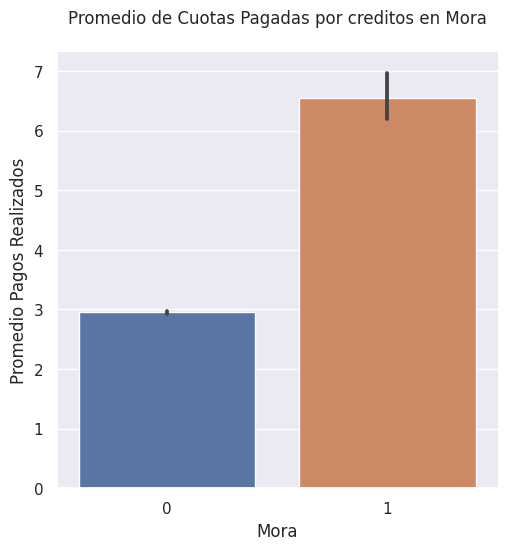

In [1086]:
sns.catplot(data=df_prestamo, x='mora' , y= 'pagos_realizados', kind='bar')
plt.title('Promedio de Cuotas Pagadas por creditos en Mora\n')
plt.xlabel('Mora')
plt.ylabel('Promedio Pagos Realizados')
plt.show()

Podemos ver como el promedio de cuotas pagadas para los creditos en mora es mucho más alto que para los creditos en mora.

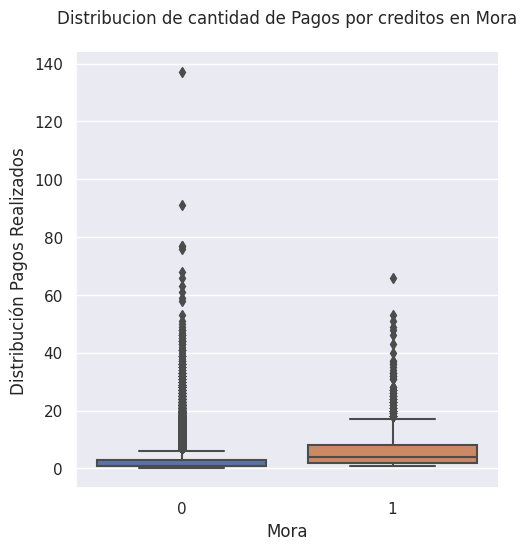

In [1087]:
sns.catplot(data=df_prestamo, x='mora' , y= 'pagos_realizados', kind='box')
plt.title('Distribucion de cantidad de Pagos por creditos en Mora\n')
plt.xlabel('Mora')
plt.ylabel('Distribución Pagos Realizados')
plt.show()

Para los creditos en mora hay una mayor dispersion de los datos.

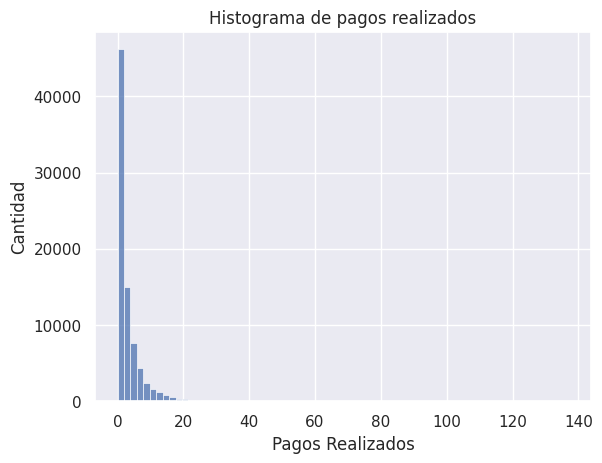

In [1088]:
sns.histplot(data=df_prestamo, x='pagos_realizados', bins=70)
plt.title('Histograma de pagos realizados')
plt.xlabel('Pagos Realizados')
plt.ylabel('Cantidad')
plt.show();

En el anterior histograma vemos como los valores para esta variable estan concentrados entre los valores de 0 y 1.

Para esta columna nuevo no pudimos restar el numero de pagos realizados con el numero de pagos pactos, debido a que la empresa par algunos tipos de prestamos, registra como forma d epago 'MENSUAL' pero en realidad dichos préstamos se efectuan de forma 'QUINCENAL'.

Al hablar con el experto de negocio me dice que para empresa es más facil gestionar de está manera ese tipo de créditos.

Debido a lo encontramos crearemos otra columna la cual contendra la resta entre la cantidad de cuotas pagadas y el promedio de la misma columna. Y asi tratar de encontrar como se comporta este con respecto a la variable objetivo.

In [1089]:
df_prestamo['cant_pag_prom'] = df_prestamo.pagos_realizados - df_prestamo.pagos_realizados.mean()

In [1090]:
df_prestamo.cant_pag_prom.describe()

count    8.099500e+04
mean     2.407848e-13
std      4.097850e+00
min     -3.016742e+00
25%     -2.016742e+00
50%     -2.016742e+00
75%     -1.674177e-02
max      1.339833e+02
Name: cant_pag_prom, dtype: float64

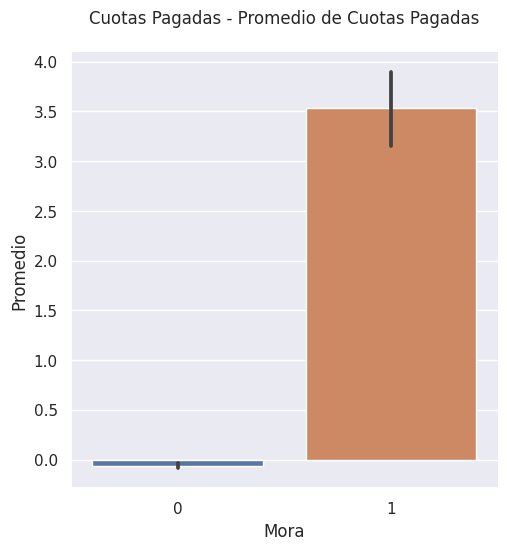

In [1091]:
sns.catplot(data=df_prestamo, x='mora' , y= 'cant_pag_prom', kind='bar')
plt.title('Cuotas Pagadas - Promedio de Cuotas Pagadas\n')
plt.xlabel('Mora')
plt.ylabel('Promedio')
plt.show()

Al graficar la variable anteriormente creada con respecto a la variable objetivo, vemos como la diferencia vuelve a ser notable. Y podemos deducir que este comportamiento se deben en gran parte a que la cantidad de creditos pertenecen a la clase 0, de la variable objetivo, es muy grande en comparacion con la clase 1, de la variable objetivo. Por ello aportan una mayor de cantidad de datos a la hora de calcular el promedio y el promedio general se parece mucho al promedio de los creditos que pertenecen a la clase 0 en la variable objetivo. 
Sin embargo no deja de ser interesante dicho comportamiento.



---
Ahora calcularemos una nueva columna donde las cuotas pagadas sera restada con la cantidad de cuotas pactadas.


In [1092]:
df_prestamo['dif_cuotas_pagos'] = df_prestamo.pagos_realizados - df_prestamo.num_cuotas

In [1093]:
df_prestamo.dif_cuotas_pagos.describe()

count    80995.000000
mean        -0.474103
std          5.803492
min       -177.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         77.000000
Name: dif_cuotas_pagos, dtype: float64

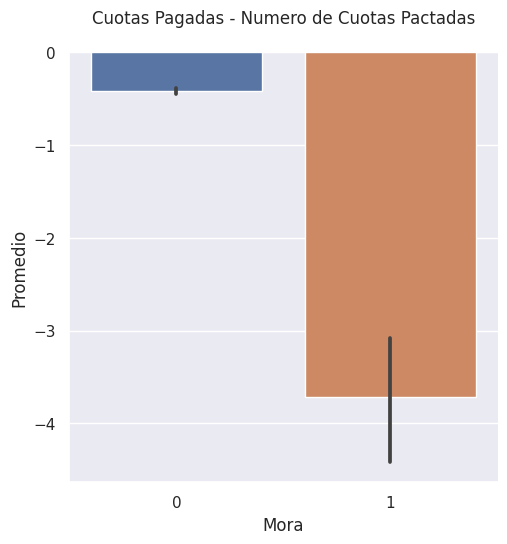

In [1094]:
sns.catplot(data=df_prestamo, x='mora' , y= 'dif_cuotas_pagos', kind='bar')
plt.title('Cuotas Pagadas - Numero de Cuotas Pactadas\n')
plt.xlabel('Mora')
plt.ylabel('Promedio')
plt.show()

Al ver que en esta grafica los promedios son negativos concluimos que en la mayoria de los casos los creditos tienen menos pagos realizados de los que fueron pactados, tanto para los creditos en mora, como para los que no.




---
# Machine Learning
Con esto se ha concluido el proceso de agregar nuevas variables y ver como se comportan con respecto a la variable objetivo. Por lo tanto empezare de nuevo a correr el modelo de prediccion sobre el nuevo dataframe.


Iniciare escogiendo las columnas del dataframe df_prestamos que seran tenidas encuenta para la prediccion, las cuales seran agregadas a un nuevo dataframe llamada 'X' y la variable objetivo a uno llamada 'y'.

In [1095]:
df_prestamo.columns

Index(['num_prestamo', 'valor_prestamo', 'valor_entregado', 'intereses',
       'valor_cuota', 'num_cuotas', 'cuotas_pen', 'tipo_interes', 'forma_pago',
       'tipo_prestamo', 'estado_prestamo', 'fecha_prestamo', 'cod_cliente',
       'valorfinalprestamo', 'dias_mora', 'saldo_prestamo', 'mora',
       'sueldo_basico', 'rango_salario', 'antiguedad', 'cred_cancelados',
       'cred_activos', 'pagos_realizados', 'cant_pag_prom',
       'dif_cuotas_pagos'],
      dtype='object')

In [1096]:
X  = df_prestamo.drop(columns=['num_prestamo','cuotas_pen','fecha_prestamo','cod_cliente','dias_mora','saldo_prestamo','mora'])
y = df_prestamo['mora']

Para las variables categoricas que hay en X, crearemos unas variables dummies.

In [1097]:
X = pd.get_dummies(X)
X

valor_prestamo  valor_entregado  ...  rango_salario_MEDIO  rango_salario_ALTO
0            230000.0              0.0  ...                    0                   0
1            440000.0              0.0  ...                    0                   0
2           1000000.0              0.0  ...                    1                   0
3            200000.0              0.0  ...                    0                   0
4            313794.0              0.0  ...                    0                   0
...               ...              ...  ...                  ...                 ...
80990        430000.0              0.0  ...                    0                   0
80991         17000.0          17000.0  ...                    0                   0
80992        300000.0         300000.0  ...                    0                   1
80993        100000.0         100000.0  ...                    0                   0
80994         40000.0          40000.0  ...                    0                   0

[80995 rows x 28 columns]

Leugo de tratar las variables categoricas, procedemos a partir los datos de X e y en datos en entrenamiento y testeo.

In [1098]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

Intentaremos correr varias veces el arbol de decision con varios valores de profundidad para mirar cual es la mas optima.

Esto lo haremos midiendo la precision con precision_score de skelearn

Encontramos la profunidad con el mayor valor precision.

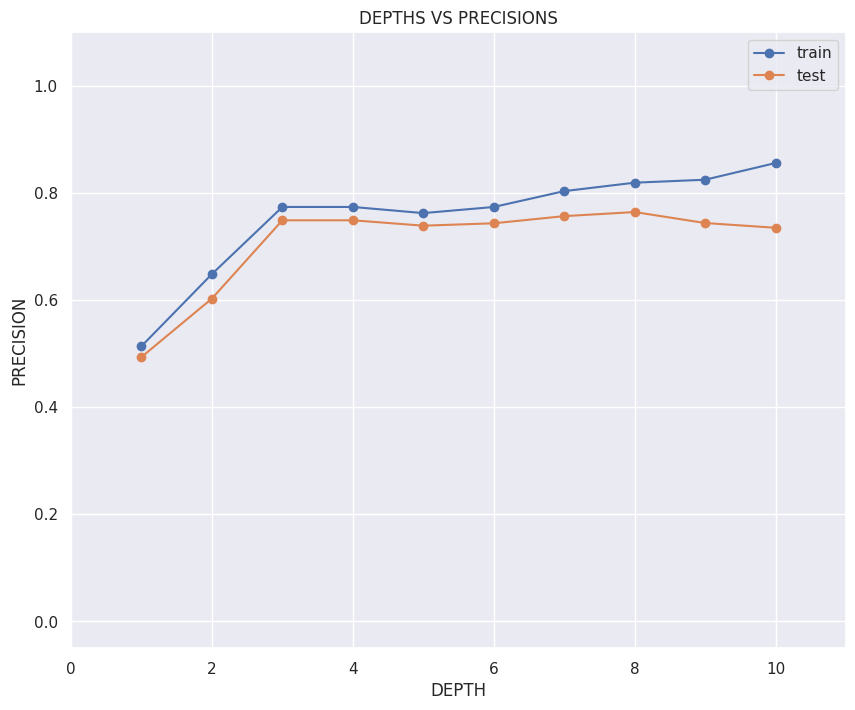

In [1099]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_precision_train = []
lista_precision_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10]

# Generamos un loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    tree = DecisionTreeClassifier(criterion='gini', max_depth = max_depth, random_state=42)
    tree.fit(X_train,y_train)
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    lista_precision_train.append(precision_score(y_train,y_train_pred))
    lista_precision_test.append(precision_score(y_test,y_test_pred))

    

plt.figure(figsize=(10,8))
plt.plot(max_depths,lista_precision_train,'-o',label='train')
plt.plot(max_depths,lista_precision_test,'-o',label='test')
plt.legend()
plt.grid(True)
plt.title('DEPTHS VS PRECISIONS')
plt.xlabel('DEPTH')
plt.ylabel('PRECISION')
plt.xlim(0,11)
plt.ylim(-0.05,1.1)
plt.show();


In [1100]:
pd.DataFrame({'max_depth':max_depths, 'Precision_test':lista_precision_test, 'Precision_train':lista_precision_train})

max_depth  Precision_test  Precision_train
0          1        0.493656         0.513875
1          2        0.602817         0.648508
2          3        0.748945         0.773842
3          4        0.748945         0.773842
4          5        0.738889         0.762376
5          6        0.743346         0.773790
6          7        0.756701         0.803396
7          8        0.764344         0.819158
8          9        0.743852         0.824670
9         10        0.734990         0.855848

Luego de mirar la grafica podemos ver como los puntajes de Precision son muy similares para ambos grupos de datos, por tanto tomare el valor de 8  debido a que alli obtuvo el mayor valor de para los datos de testeo.



In [1101]:
tree_classifier = DecisionTreeClassifier(criterion='gini', max_depth = 8, random_state=42)
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Luego de ser entrenado el modelo con los datos de entrenamiento, procedemos a predecir tanto para los datos con los que fue entrenado como los de testeo.

In [1102]:
y_train_pred = tree_classifier.predict(X_train)
y_test_pred = tree_classifier.predict(X_test)

Matriz de confusion para los datos de entrenamiento:

Precision:  0.9949379144913222


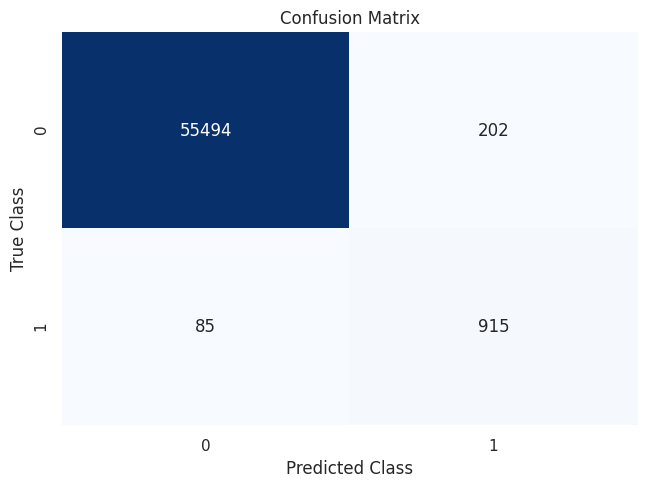

In [1103]:
#Precision para los datos de entrenamiento
print("Precision: ",accuracy_score(y_train,y_train_pred))
# crear mapa de calor dibujar la matriz de confusion
sns.heatmap(pd.DataFrame(confusion_matrix(y_train,y_train_pred)), annot=True, fmt='.0f' , cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

Acontinuacion mostraremos la matriz de confusion para los datos de entrenamiento anterior y compararemos dichos valores.

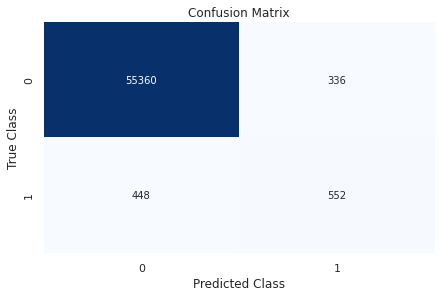



Matriz de confusion para los datos de testeo:

Precision:  0.9930038273179966


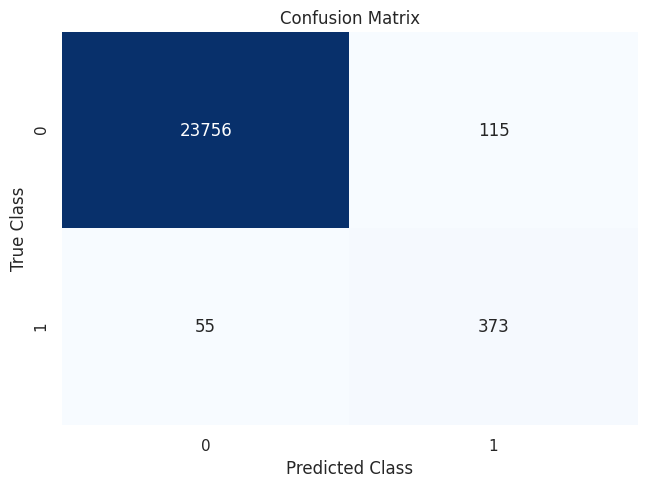

In [1104]:
#Precision para los datos de entrenamiento
print("Precision: ",accuracy_score(y_test,y_test_pred))
# crear mapa de calor dibujar la matriz de confusion
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_test_pred)), annot=True, fmt='.0f' , cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

Matriz de confusion para los datos de testeo anterior: 

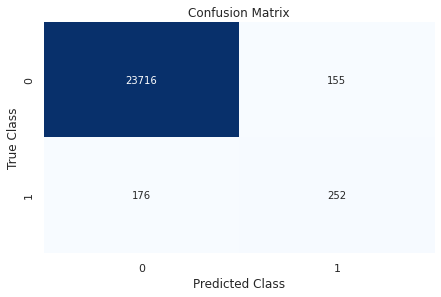

Al hacer una comparación entre las matrices de confusion anteriores con las nuevas vemos que han mejorado notablemente la prediccion, aumentando los casos de verdaderso positivos y disminuyendo los falsos positivos en ambos casos ( train y test)

# Reportes de Metricas

Reporte de metricas para los datos de entrenamiento:

In [1105]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55696
           1       0.82      0.92      0.86      1000

    accuracy                           0.99     56696
   macro avg       0.91      0.96      0.93     56696
weighted avg       1.00      0.99      1.00     56696



Reporte de metricas para los datos de entrenamiento anterior:


```
                precision   recall   f1-score  support

           0       0.99      0.99      0.99     55696
           1       0.62      0.55      0.58      1000

    accuracy                           0.99     56696
   macro avg       0.81      0.77      0.79     56696
weighted avg       0.99      0.99      0.99     56696
```





Nos enfocaremos en mirar los puntajes para la clase 1.

*   Precision mejoró 14% pasando de 62% a 76% 
*   Recall mejoró 37% pasando de 55% a 92%
*   F1-score mejoró 26% pasando de 58% a 84%    





Metricas para los datos de Testeo:

In [1106]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23871
           1       0.76      0.87      0.81       428

    accuracy                           0.99     24299
   macro avg       0.88      0.93      0.91     24299
weighted avg       0.99      0.99      0.99     24299



Reporte de metricas para los datos de testeo anterior:



```
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     23871
           1       0.62      0.59      0.60       428

    accuracy                           0.99     24299
   macro avg       0.81      0.79      0.80     24299
weighted avg       0.99      0.99      0.99     24299
```



Nos enfocaremos en mirar los puntajes para la clase 1.

*   Precision mejoró 12% pasando de 62% a 74% 
*   Recall mejoró 34% pasando de 59% a 93%
*   F1-score mejoró 22% pasando de 60% a 82%    





Es interesante ver como apesar de tener la misma cantidad de instancias pero aumentando la cantidad de variables podemos aumentar notablemente el poder de prediccion de nuestro modelo.

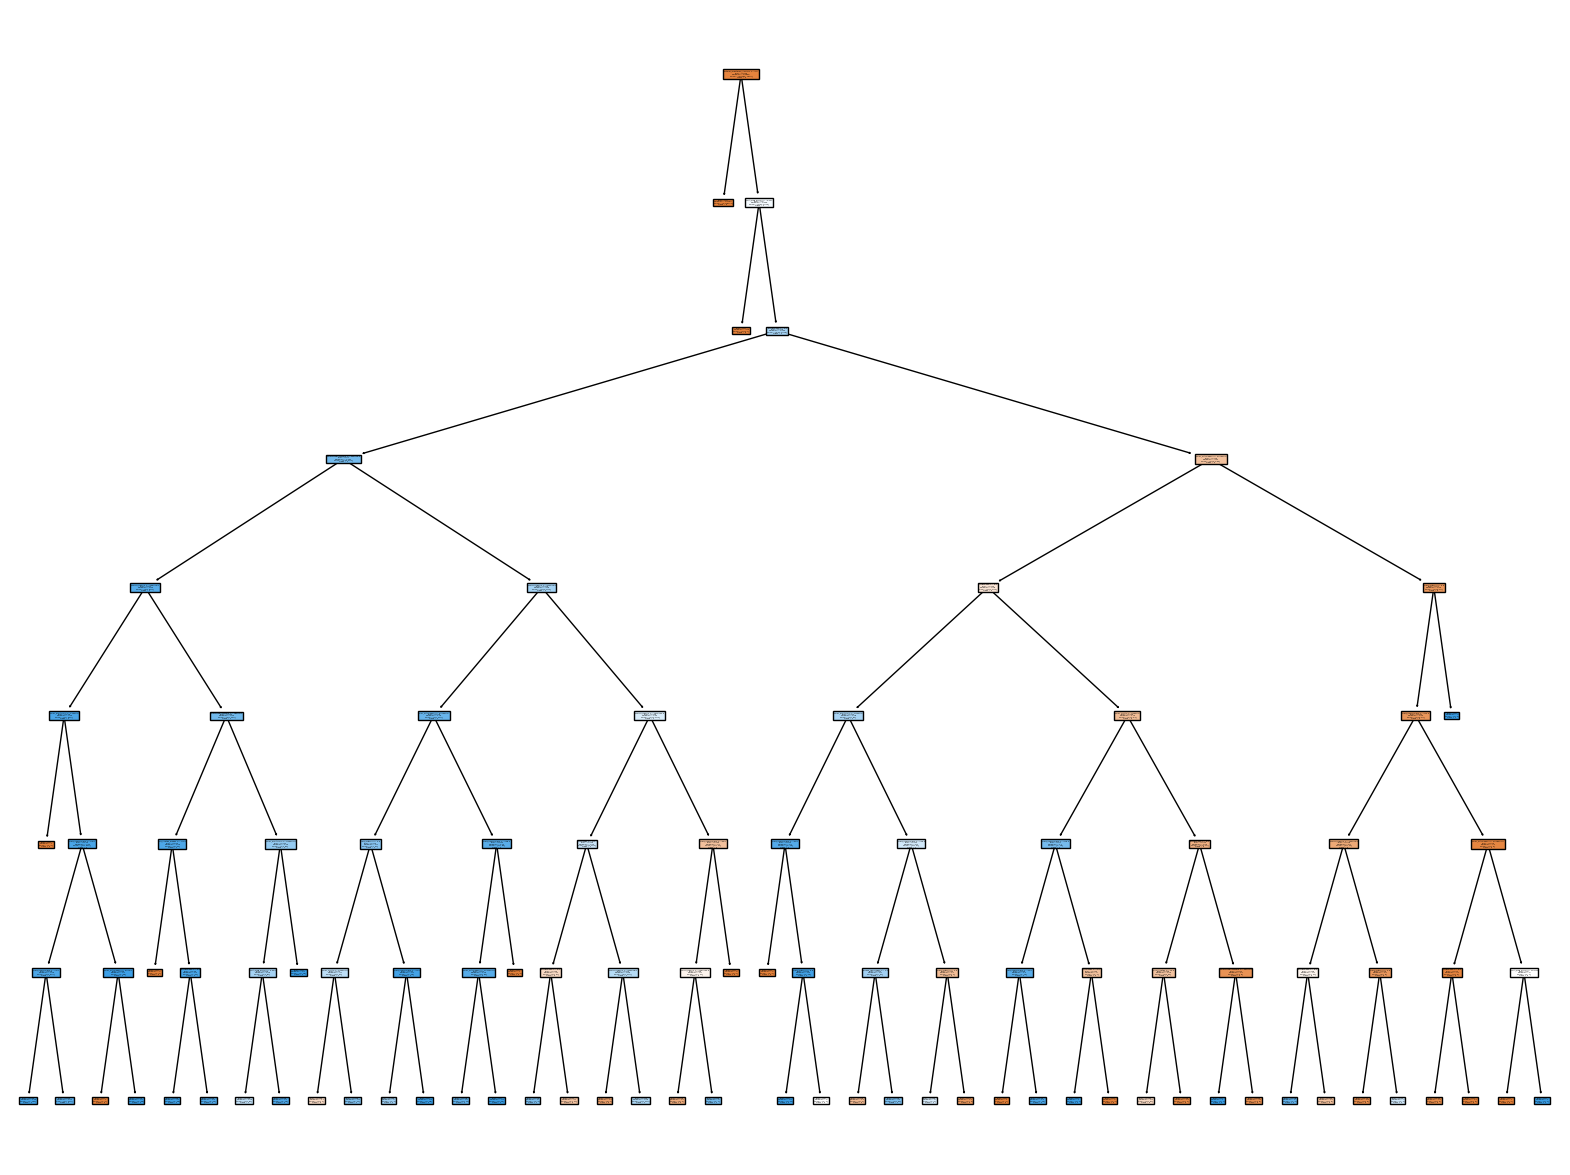

In [1107]:
from sklearn import tree
if tree_classifier.max_depth < 15:
    plt.figure(figsize = (20,15))
    plt.style.use('default')
    tree.plot_tree(tree_classifier, filled = True, fontsize=None, feature_names=X.columns.to_list(), class_names=['0', '1'])
    plt.show();

In [1108]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X.columns,
                             'importancia': tree_classifier.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


predictor  importancia
23     estado_prestamo_ACTIVO     0.633597
11              cant_pag_prom     0.174863
7                  antiguedad     0.091110
6               sueldo_basico     0.021576
5          valorfinalprestamo     0.021227
1             valor_entregado     0.014378
8             cred_cancelados     0.012633
9                cred_activos     0.008456
3                 valor_cuota     0.006158
0              valor_prestamo     0.005619
2                   intereses     0.003009
4                  num_cuotas     0.002662
10           pagos_realizados     0.002555
12           dif_cuotas_pagos     0.002158
26        rango_salario_MEDIO     0.000000
25         rango_salario_BAJO     0.000000
24  estado_prestamo_CANCELADO     0.000000
20     tipo_prestamo_ANTICIPO     0.000000
22    tipo_prestamo_PRINCIPAL     0.000000
21    tipo_prestamo_MERCANCIA     0.000000
14      tipo_interes_VARIABLE     0.000000
19    tipo_prestamo_ADICIONAL     0.000000
18         forma_pago_SEMANAL     0.000000
17       forma_pago_QUINCENAL     0.000000
16         forma_pago_MENSUAL     0.000000
15         forma_pago_DECENAL     0.000000
13          tipo_interes_FIJO     0.000000
27         rango_salario_ALTO     0.000000

Al irar los criterios de importancia de las variables usadas para predicir vemos como algunas variables de las variables que se creamos, el algoritmo del arbol las uso para predecir el comportamiento de la variable objetivo. como por ejemplo:

-	cant_pag_prom	0.183859
-	antiguedad	0.091892
-	sueldo_basico	0.014244
-	cred_activos	0.002992

Entre estas variables nos suma aproximadamente un 30% del poder de predicción.

Apersar de poder predecir los creditos que estan en mora, este enfoque pierde relevancia debido a que contamos con un problema en la base de datos. Donde las fechas de credito no son consistentes con las fechas de los pagos que se realizan (en algunos casos).

Luego al revisar las bifurcaciones que crea el modelo de prediccion que usamos,
vemos como en al primera, de estas bifurcaciones, toma la columna 'estado_credito' la cual posee dos estado: 'CANCELADO' para los creditos que ya estan pagos y 'ACTIVOS' para los creditos que aun estan pagando. al analizar esta variable podemos darnos cuenta que el valor de esta variable no es algo 
inherente de los dato, sino que por el contrario estos valores son dados por el sistema despues de comprobar si el credito lo pagaron en su totalidad o no.
Por tanto como los creditos en MORA no han sido cancelados en su totalidad el sistema los registra como ACTIVOS, es decir, los creditos en mora perteneces a la clase ACTIVOS de la columna estado_prestamo.

Para mirar que tan importante era dicha variable en el modelo corrimos feature_importances_, que es una funcion que tienen los arboles de decision  que nos permite ver el porcentaje que aporta las variables en la prediccion del modelo. Al revisar la variable estado_prestamo_ACTIVO (columna estado_prestamo a la cual se le aplico la funcion get.dummies) vemos que esta aporta el 67.767% del poder de prediccion.

Para corregir este error de filtrado volveremos a crear entrenar el modelo pero sin dicha columna.


Para intentar mejorar un poco el modelo de prediccion para la columna rango salario en vez de aplicar la funcion get.dummies, haremos una funcion map que etiquete los bienes creados en  0,1,2. 0 para rango 'BAJO', 1 para rango 'MEDIO' y 2 para rango 'ALTO'. esto pensando en que son variables categoricas tienen un orden. Ejemplo: el rango 'ALTO' implica que gana mas que los que se encuentran el rango 'BAJO' y 'MEDIO'. 

Para la variable sueldo_basico nos dimos cuenta que tenemos una gran cantidad de datos y al hablar con el experto de negocio nos dice que esos clientes, casi todos, ganan el minimo. Por ellos imputaremos el valor del salario minimo para las instancias que tengan dicho valor en 0.

Luego de realizar todas estas modificaciones entrenaremos el arbol de decision nuevamente, comprobaremos las metricas y miraremos la importancia de las variables.

In [1109]:
df_prestamo.columns

Index(['num_prestamo', 'valor_prestamo', 'valor_entregado', 'intereses',
       'valor_cuota', 'num_cuotas', 'cuotas_pen', 'tipo_interes', 'forma_pago',
       'tipo_prestamo', 'estado_prestamo', 'fecha_prestamo', 'cod_cliente',
       'valorfinalprestamo', 'dias_mora', 'saldo_prestamo', 'mora',
       'sueldo_basico', 'rango_salario', 'antiguedad', 'cred_cancelados',
       'cred_activos', 'pagos_realizados', 'cant_pag_prom',
       'dif_cuotas_pagos'],
      dtype='object')

In [1110]:
X = df_prestamo.drop(columns= ['num_prestamo','cuotas_pen','estado_prestamo',
                               'fecha_prestamo','cod_cliente','dias_mora',
                               'saldo_prestamo','mora','dif_cuotas_pagos'])
y = df_prestamo['mora']

Dividí nuevamente los datos del dataframe df_prestamo en X y y, donde X posee los datos que se usaran para predecir y la variable objetivo estara en y.

In [1111]:
X.rango_salario.unique()

['BAJO', 'MEDIO', 'ALTO']
Categories (3, object): ['BAJO' < 'MEDIO' < 'ALTO']

In [1112]:
#X['rango_salario'] = X['rango_salario'].map({'BAJO':0, 'MEDIO':1, 'ALTO':2})

Decidí comentar la celda anterior porque al correr el modelo despues de aplicar la funcion map en la columna rango salarial no se encontro ninguna mejora y el modelo no le dio importancia a dicha variable. Por tanto decidí dejarla como estaba.

In [1113]:
X.rango_salario.unique()

['BAJO', 'MEDIO', 'ALTO']
Categories (3, object): ['BAJO' < 'MEDIO' < 'ALTO']

In [1114]:
X.loc[X.sueldo_basico==0,'sueldo_basico'] = sal_minimo

Par la columna sueldo_basico impute el valor del salario minimo, usando la variable 'sal_minimo' que declare anteriormente al crear los rangos salariales.


In [1115]:
X.sueldo_basico.value_counts()

877804.0     24084
1000000.0     3850
800000.0      3355
1200000.0     3311
616000.0      3152
             ...  
836000.0         1
6180000.0        1
3750000.0        1
6443000.0        1
20000.0          1
Name: sueldo_basico, Length: 294, dtype: int64

In [1116]:
#X.rango_salario = X.rango_salario.astype(int)
#X.dtypes

La celda anterior la converti en un comentario debido a que la columna rango_salario ya no se le aplico la funcion map que la convertir en numeros.

In [1117]:
X = pd.get_dummies(X)
X.shape

(80995, 25)

In [1118]:
X

valor_prestamo  valor_entregado  ...  rango_salario_MEDIO  rango_salario_ALTO
0            230000.0              0.0  ...                    0                   0
1            440000.0              0.0  ...                    0                   0
2           1000000.0              0.0  ...                    1                   0
3            200000.0              0.0  ...                    0                   0
4            313794.0              0.0  ...                    0                   0
...               ...              ...  ...                  ...                 ...
80990        430000.0              0.0  ...                    0                   0
80991         17000.0          17000.0  ...                    0                   0
80992        300000.0         300000.0  ...                    0                   1
80993        100000.0         100000.0  ...                    0                   0
80994         40000.0          40000.0  ...                    0                   0

[80995 rows x 25 columns]

In [1119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

Divido los datos en datos de train y test donde dejo el 30% de ellos para test.

In [1120]:
(df_prestamo.mora.isin([1]).sum()/len(df_prestamo))*100

1.7630717945552197

In [1121]:
(df_prestamo.mora.isin([0]).sum()/len(df_prestamo))*100

98.23692820544478

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


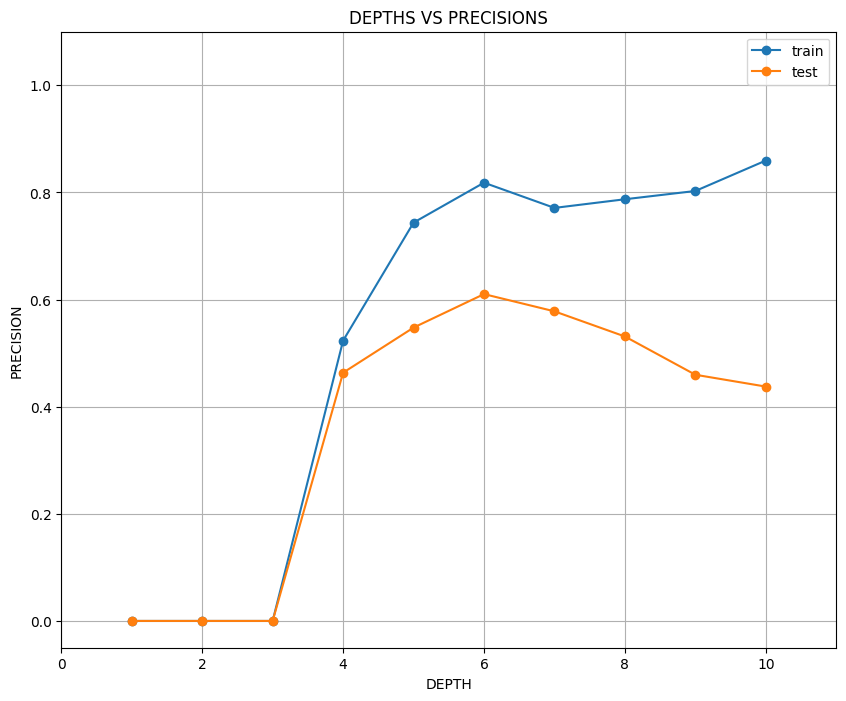

In [1122]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_precision_train = []
lista_precision_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = np.arange(1,11)

# Generamos un loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    tree = DecisionTreeClassifier(criterion='gini', max_depth = max_depth, random_state=42)
    tree.fit(X_train,y_train)
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    lista_precision_train.append(precision_score(y_train,y_train_pred))
    lista_precision_test.append(precision_score(y_test,y_test_pred))

    

plt.figure(figsize=(10,8))
plt.plot(max_depths,lista_precision_train,'-o',label='train')
plt.plot(max_depths,lista_precision_test,'-o',label='test')
plt.legend()
plt.grid(True)
plt.title('DEPTHS VS PRECISIONS')
plt.xlabel('DEPTH')
plt.ylabel('PRECISION')
plt.xlim(0,11)
plt.ylim(-0.05,1.1)
plt.show();


In [1123]:
pd.DataFrame({'max_depth':max_depths, 'Precision_test':lista_precision_test, 'Precision_train':lista_precision_train})

max_depth  Precision_test  Precision_train
0          1        0.000000         0.000000
1          2        0.000000         0.000000
2          3        0.000000         0.000000
3          4        0.463415         0.523297
4          5        0.547619         0.743590
5          6        0.610169         0.818182
6          7        0.577982         0.771084
7          8        0.531034         0.787234
8          9        0.459596         0.802691
9         10        0.437500         0.859504

Luego de mirar la grafica podemos ver como los puntajes de Precision son muy similares para ambos grupos de datos, por tanto tomare el valor de 6  debido a que alli obtuvo el mayor valor de para los datos de testeo.



In [1124]:
tree_classifier = DecisionTreeClassifier(criterion='gini', max_depth = 6, random_state=42)
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Se creo la instacia del arbol de decision y se entreno con los datos de train.

In [1125]:
y_train_pred = tree_classifier.predict(X_train)

Usamos los mismos datos de entrenamiento para predecir.

Accuracy:  0.9839671229010865


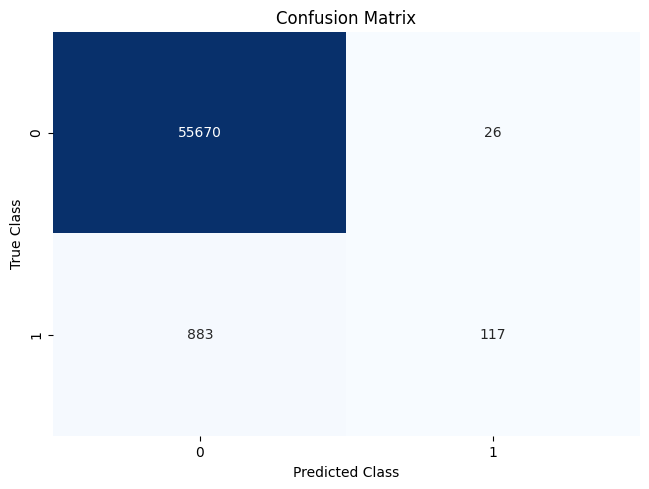

In [1126]:
#Precision para los datos de entrenamiento
print("Accuracy: ",accuracy_score(y_train,y_train_pred))
# crear mapa de calor dibujar la matriz de confusion
sns.heatmap(pd.DataFrame(confusion_matrix(y_train,y_train_pred)), annot=True, fmt='.0f' , cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [1127]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     55696
           1       0.82      0.12      0.20      1000

    accuracy                           0.98     56696
   macro avg       0.90      0.56      0.60     56696
weighted avg       0.98      0.98      0.98     56696



In [1128]:
y_test_pred = tree_classifier.predict(X_test)

Ahora usamos los datos de testeo para y predecir las clases a las que pertenecen.

Accuracy:  0.9829211078645211


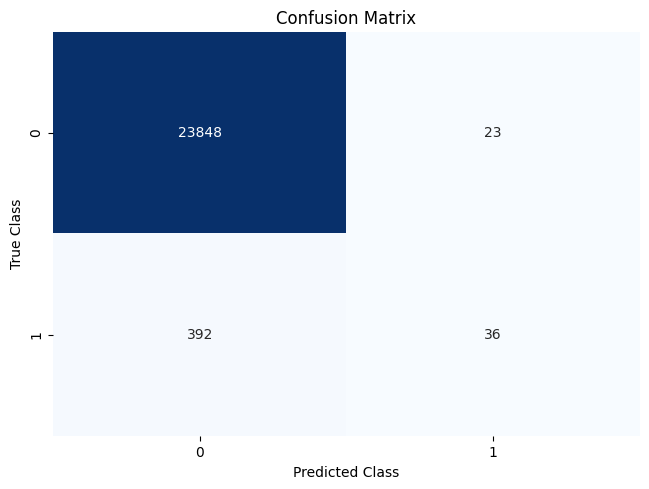

In [1129]:
#Precision para los datos de entrenamiento
print("Accuracy: ",accuracy_score(y_test,y_test_pred))
# crear mapa de calor dibujar la matriz de confusion
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_test_pred)), annot=True, fmt='.0f' , cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [1130]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     23871
           1       0.61      0.08      0.15       428

    accuracy                           0.98     24299
   macro avg       0.80      0.54      0.57     24299
weighted avg       0.98      0.98      0.98     24299



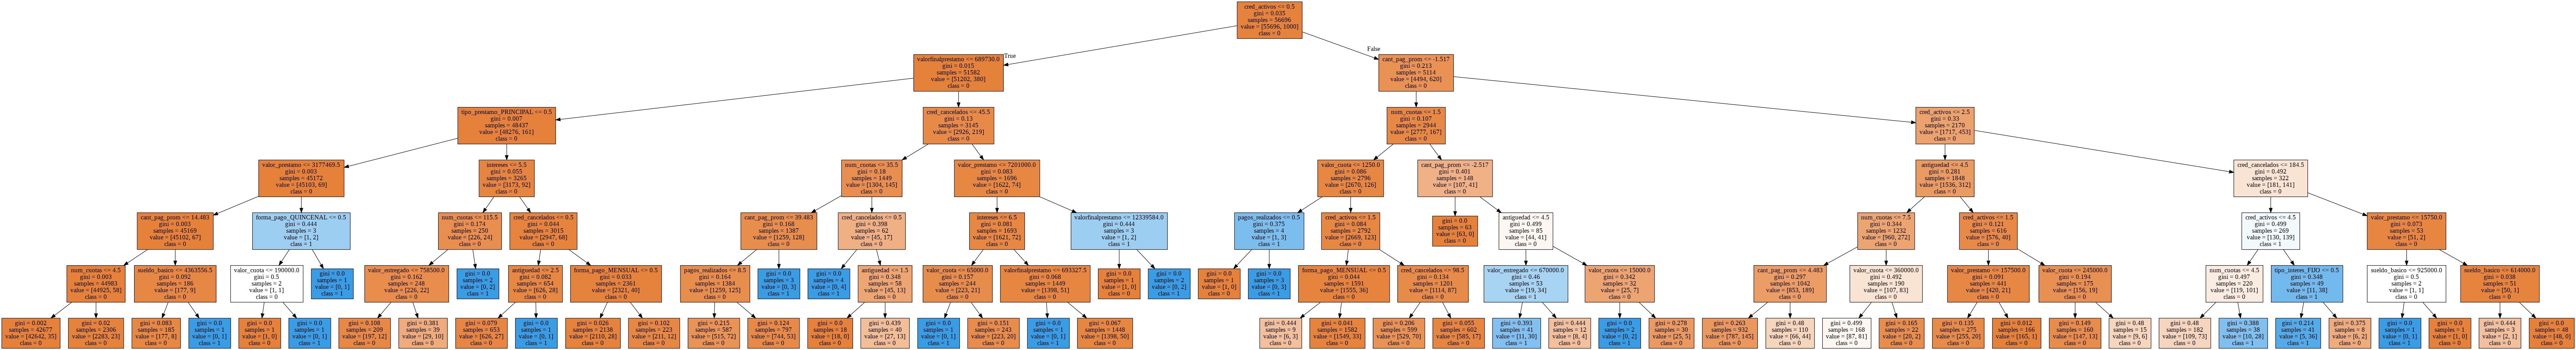

In [1131]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(tree_classifier, out_file = dot_data,  
                filled = True,
                feature_names=X.columns.to_list(),
                class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [1132]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X.columns,
                             'importancia': tree_classifier.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


predictor  importancia
9              cred_activos     0.371524
11            cant_pag_prom     0.198153
4                num_cuotas     0.109229
8           cred_cancelados     0.075724
7                antiguedad     0.067843
5        valorfinalprestamo     0.062744
3               valor_cuota     0.038730
0            valor_prestamo     0.014622
1           valor_entregado     0.011938
12        tipo_interes_FIJO     0.011360
21  tipo_prestamo_PRINCIPAL     0.009304
10         pagos_realizados     0.007813
2                 intereses     0.007683
6             sueldo_basico     0.007418
15       forma_pago_MENSUAL     0.005200
16     forma_pago_QUINCENAL     0.000717
13    tipo_interes_VARIABLE     0.000000
14       forma_pago_DECENAL     0.000000
17       forma_pago_SEMANAL     0.000000
18  tipo_prestamo_ADICIONAL     0.000000
19   tipo_prestamo_ANTICIPO     0.000000
20  tipo_prestamo_MERCANCIA     0.000000
22       rango_salario_BAJO     0.000000
23      rango_salario_MEDIO     0.000000
24       rango_salario_ALTO     0.000000

In [1133]:
precision_score(y_test,y_test_pred)

0.6101694915254238

In [1134]:
recall_score(y_train,y_train_pred)

0.117

In [1135]:
f1_score(y_train,y_train_pred)

0.20472440944881892

Luego de depurar variables opyuvimos estos valores para Precision:



*   Train: 0.8181818181818182
*   Test: 0.6101694915254238

y estas seran las metricas a comparar con los otros modelos que correremos acontinuacion.


# **NUEVOS MODELOS DE MACHINE LEARNING**

# K-Vecinos



Es un modelo que busca en las observaciones que estan más cerca a la que se está prediciendo y le asigna un clase dependiendo en la mayoría de datos que le rodean.


Importamos el modelo.

In [1136]:
from sklearn.neighbors import KNeighborsClassifier

Luego de importar las librerias buscaremos el numero de vecinos mas optimos par anuestro modelo.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


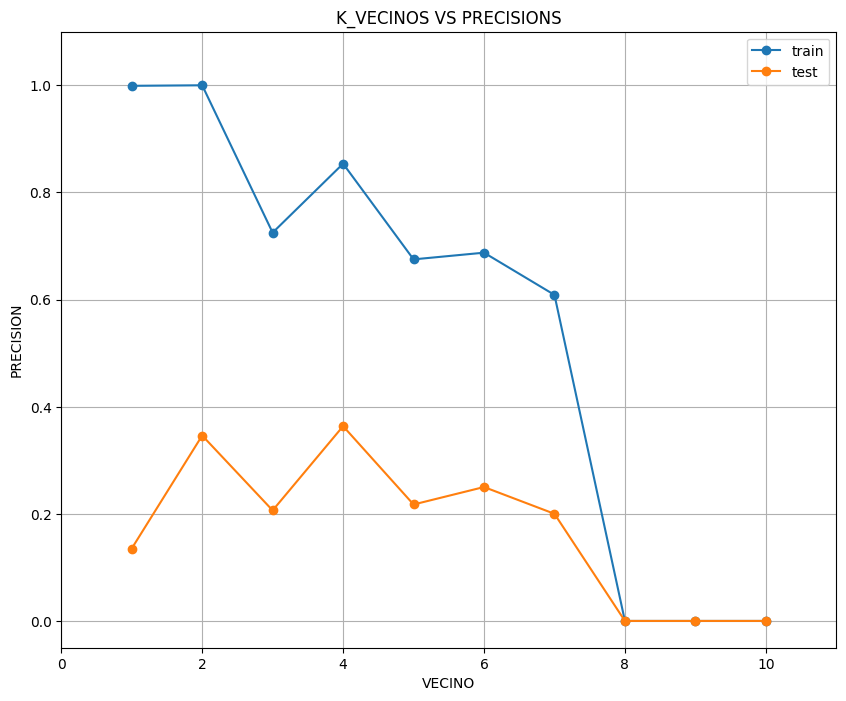

In [1137]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_precision_train = []
lista_precision_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10]

# Generamos un loop sobre los distintos valores de profundidad 
for k in k_vecinos:
    vecinos_clf = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    vecinos_clf.fit(X_train,y_train)
    y_train_pred = vecinos_clf.predict(X_train)
    y_test_pred = vecinos_clf.predict(X_test)
    lista_precision_train.append(precision_score(y_train,y_train_pred))
    lista_precision_test.append(precision_score(y_test,y_test_pred))

    

plt.figure(figsize=(10,8))
plt.plot(k_vecinos,lista_precision_train,'-o',label='train')
plt.plot(k_vecinos,lista_precision_test,'-o',label='test')
plt.legend()
plt.grid(True)
plt.title('K_VECINOS VS PRECISIONS')
plt.xlabel('VECINO')
plt.ylabel('PRECISION')
plt.xlim(0,11)
plt.ylim(-0.05,1.1)
plt.show();

In [1138]:
pd.DataFrame({'max_depth':k_vecinos, 'Precision_test':lista_precision_test, 'Precision_train':lista_precision_train})

max_depth  Precision_test  Precision_train
0          1        0.135211         0.998998
1          2        0.346154         1.000000
2          3        0.206349         0.724891
3          4        0.363636         0.853659
4          5        0.217391         0.675000
5          6        0.250000         0.687500
6          7        0.200000         0.608696
7          8        0.000000         0.000000
8          9        0.000000         0.000000
9         10        0.000000         0.000000

Al analizar la tabla anterior vemos como el maximo puntaje que obtuve el modelo de vecinos mas cercanos fue para el numerod e vecinos 4, donde obtuvo unas metricas de:
	
* Train: 0.853659
* Test: 0.363636



# Regresion Logaritmica

Este modelo es otro que nos sirve para casos de clasificacion:

Importaremos el modelo.

In [1139]:
from sklearn.linear_model import LogisticRegression

In [1140]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1141]:
y_train_pred = lgr.predict(X_train)
y_test_pred = lgr.predict(X_test)
print('Precision Train: ',precision_score(y_train,y_train_pred))
print('Precision Test: ',precision_score(y_test,y_test_pred))

Precision Train:  0.3
Precision Test:  0.11764705882352941


#Resultado Metricas

1.   Arbol de Decision:
  *   Train: 0.8181818181818182
  *   Test: 0.6101694915254238
2.   K-Vecinos:
  * Train: 0.853659
  * Test: 0.363636
3. Regresion Logistica:
  * Train:  0.3
  * Test:  0.11764705882352941

Recordemos que estos valores son para Precision.

Luego de correr los tres modelos diferentes y buscar algunos hiperparametros que fueran mas optimos para esos modelos, encontramos que el mejor modelo que nos ayudar a predecir es el ARBOL DE DECISiON, por tanto lo tomaremos como modelo final.

Arbol de decision con una profundidad maxima de 6.

Luego de correr el modelo con los nuevos datos de entrenamiento vemos como todas sus metricas bajaron y aumentaron los falsos positivos considerablemente. Esto era lo esperado debido a que una de las variables que sacamos de los dastos de entrenamiento aportaba casi 68% de la prediccion en los modelos anteriores.

Pero aún que las metricas no son muy buenas podemos ver que algunas de las variables que se agregaron al dataframe df_prestamo, apartir de nuevas tablas o aplicando algun tipo de funcion en los datos, tomaron relevancia para el modelo. Y podriamos tomar estas nuevas reglas que creo el arbol para decirle al experto de negocio enfocarse en ellas al momento de querer aprobar un credito.

---
# **CONCLUSIONES**

**Dificultades:**

- Cargar los archivos .csv con la informacion de las tablas, debido a que al momento de exportarlas a un arhivo .csv directamente desde MySql no sed generaba correctamente dicho archivo. Y como solución me conecte a la base de datos desde un notebook en jupyter y luego con una funcion de la libreria pandas exporte a un archivo .csv dicha informacion. Este proceso se realizo para cada una de las tabla necesarias.

- En la tabla inicial (prestamos) no se encontro ninguna relación significativa entre los datos.

- La variable 'estado_prestamo' del dataframe df_prestamos genera leaking.

- La variable objetivo 'mora' esta muy desbalanceada donde un 98.23% de los datos pertenece a la clase 0 y el resto a la clase 1.

- Al entrenar inicialmente un arbolde decision solamente con los datos de la tabla prestamos, no fue muy preciso a la hora de predecir las instancias de la clase 1 de la variable objetivo.

- Se intento crear una variable que debia contener la cantidad de dias promedio que el cliente se atrasa en una cuota, pero al cruzar entre las difentes tablas encontramos que las fechas de los creditos, pagos e ingreso del cliente presentan anomalias. Donde en algunos casos el la fecha del credito era mayor a la fecha de los pagos y el mismo caso se presento en la tabla clientes, donde la fecha de ingreso del cliente al sistema era mayor a la fecha de los creditos. Por ello fue imposible crear una variable a partir de esta informacion.

- La forma de pago (MENSUAL, QUIENCENAL, etc) no corresponde a lo que sucede en la realidad, cuando se intento crear una nueva variable apartir de la resta de las cuotas que se habian pagado para un credito, y el numero de cuotas pactadas para dicho credito (num_cuotas), se encontraron valore negativos muy grandes y es debido a que en algunos casos se tenia forma de pago MENSUAL y se reportaban pagos QUINCENALES, entre otros casos. Lo cual corroboró el el experto de negocio.

- Las fechas de los creditos y de los pagos son inconsistentes en algunas ocasiones, lo que nos dificulta a la hora de analizar el comportamiento de un credito con respecto a sus pago, para encontrar los dias promedio en que realiza los pagos y cuantos dias se atrasa o se adelanta para el pago.

- En algunos casos se encontraron tablas con valores en 0 o valores que no correspondian. Por ejemplo: Clientes con sueldo_basico en 0.

- En algunos momentos fue dificil la comunicación con el experto de negocio para aclarar dudas y comunicar hallazgos.

**Aciertos:**

- Uno de los aciertos mas grande fue el haber encontrado todos estos problemas de inconsistencias, ausencias y falta de rigurosidad a la hora de recolectar la información en el sistema.

- El aprendizaje de todas la funciones y el manejo de los tipos de datos que podemos encontrarnos.

- Aprender a conectar desde python a una base de datos MySql.

- Los analisis que se realizaron al momento de crear las variables nuevas, ya que el modelo de predicción las tomo encuenta a la hora de tomar decisiones.

- El haber comunicado al experto de negocio que a la hora de aprobar un credito seria muy bueno tener encuenta datos como: la cantidad de pagos que ha realizado en creditos anteriores, antiguedad del cliente, cantidad de creditos cancelados, cantidad de creditos activos y realizar un cruze entre las cuotas en promedio con las que el cliente desea pagar.

- Toda la parte de investigación sobre casos parecidos a los encontrados, ya sea en consulta con el profesor, en internet, con otros profesionales, etc. 

- Al asistir a las asesorias con el profesor, en muchas ocasiones resalto que la mayoria de los problemas que se presentaron, son problemas que se encontraran en el mercado, Lo cual me llevaba a generar un aprendizaje extra, a parte de lo visto en clase y aplicado en el proyecto.

**Para mejorar:**

- Para el proximo sprint escoger un dataset que me permita generar otro tipo de aprendizaje.

- La redeacción y trasmitir de forma más clara y concisa los hallazgos.


